#1. Import i wstępna analiza danych źródłowych
Jako przedmiot badań zostało wytypowane miasto Copenhaga


In [ ]:
#import modułów

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import scipy.stats as ss
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from operator import index
from statsmodels.graphics.mosaicplot import mosaic

In [ ]:
#import danych z Kopenhagi do zmiennej

data = pd.read_csv("http://data.insideairbnb.com/denmark/hovedstaden/copenhagen/2023-12-27/data/listings.csv.gz")

In [ ]:
#informacje o danych

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18545 entries, 0 to 18544
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            18545 non-null  int64  
 1   listing_url                                   18545 non-null  object 
 2   scrape_id                                     18545 non-null  int64  
 3   last_scraped                                  18545 non-null  object 
 4   source                                        18545 non-null  object 
 5   name                                          18545 non-null  object 
 6   description                                   0 non-null      float64
 7   neighborhood_overview                         8560 non-null   object 
 8   picture_url                                   18545 non-null  object 
 9   host_id                                       18545 non-null 

In [ ]:
#RangeIndex: 18545 entries, 0 to 18544 - 18545 obserwacji
#Data columns (total 75 columns): - 75 cech opisujących
#dtypes: float64(21), int64(21), object(33) - 42 wymiarów liczbowych, 33 wymiary nieliczbowe
#memory usage: 10.6+ MB - wielkość pliku

In [ ]:
#usunięcie ograniczników w wyświetlaniu danych

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
#nagłówek danych

data.head()

id                                      listing_url  \
0  772195193586734462  https://www.airbnb.com/rooms/772195193586734462   
1  993508926988263521  https://www.airbnb.com/rooms/993508926988263521   
2  973046361084511805  https://www.airbnb.com/rooms/973046361084511805   
3            52551491            https://www.airbnb.com/rooms/52551491   
4  723099448414722172  https://www.airbnb.com/rooms/723099448414722172   

        scrape_id last_scraped           source  \
0  20231227173932   2024-01-03  previous scrape   
1  20231227173932   2023-12-27      city scrape   
2  20231227173932   2023-12-28      city scrape   
3  20231227173932   2023-12-28      city scrape   
4  20231227173932   2023-12-28      city scrape   

                                                name  description  \
0  Rental unit in Copenhagen · 1 bedroom · 1 bed ...          NaN   
1  Rental unit in Copenhagen · ★4.67 · 1 bedroom ...          NaN   
2  Rental unit in Copenhagen · ★4.86 · 1 bedroom ...          NaN   
3  Condo in Copenhagen · ★5.0 · 1 bedroom · 1 bed...          NaN   
4  Condo in Copenhagen · ★4.94 · 2 bedrooms · 3 b...          NaN   

                               neighborhood_overview  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3  Having won prices for its urban architecture a...   
4                                                NaN   

                                         picture_url    host_id  \
0  https://a0.muscache.com/pictures/miso/Hosting-...  139504671   
1  https://a0.muscache.com/pictures/miso/Hosting-...  540024469   
2  https://a0.muscache.com/pictures/hosting/Hosti...  413314931   
3  https://a0.muscache.com/pictures/ae4d3db9-9f91...   36416123   
4  https://a0.muscache.com/pictures/32c9850c-17d9...    5049349   

                                      host_url  host_name  host_since  \
0  https://www.airbnb.com/users/show/139504671  Alexandra  2017-07-09   
1  https://www.airbnb.com/users/show/540024469      Marie  2023-10-02   
2  https://www.airbnb.com/users/show/413314931      Julie  2021-07-16   
3   https://www.airbnb.com/users/show/36416123     Kasper  2015-06-22   
4    https://www.airbnb.com/users/show/5049349  Cherihene  2013-02-11   

         host_location                                         host_about  \
0  Copenhagen, Denmark                                                NaN   
1                  NaN                                                NaN   
2  Copenhagen, Denmark                                                NaN   
3  Copenhagen, Denmark  We are a friendly and outgoing Danish/Brazilia...   
4  Copenhagen, Denmark       Tunisian, non smoker, english speaker, clean   

   host_response_time host_response_rate host_acceptance_rate  \
0      within an hour               100%                  57%   
1  within a few hours               100%                 100%   
2  within a few hours                80%                  57%   
3        within a day               100%                  48%   
4  within a few hours               100%                  79%   

  host_is_superhost                                 host_thumbnail_url  \
0                 f  https://a0.muscache.com/im/pictures/user/32ecb...   
1                 f  https://a0.muscache.com/im/pictures/user/0c28f...   
2                 f  https://a0.muscache.com/im/pictures/user/57556...   
3                 f  https://a0.muscache.com/im/pictures/user/3c864...   
4                 t  https://a0.muscache.com/im/users/5049349/profi...   

                                    host_picture_url host_neighbourhood  \
0  https://a0.muscache.com/im/pictures/user/32ecb...                NaN   
1  https://a0.muscache.com/im/pictures/user/0c28f...                NaN   
2  https://a0.muscache.com/im/pictures/user/57556...                NaN   
3  https://a0.muscache.com/im/pictures/user/3c864...                NaN   

In [ ]:
#wyświetlenie 5 losowo wybranych obserwacji

data.sample(5)

id                                      listing_url  \
14730             7853704             https://www.airbnb.com/rooms/7853704   
17674  708371351021722083  https://www.airbnb.com/rooms/708371351021722083   
5549   832554683074878565  https://www.airbnb.com/rooms/832554683074878565   
4968             42618136            https://www.airbnb.com/rooms/42618136   
8519              3432774             https://www.airbnb.com/rooms/3432774   

            scrape_id last_scraped           source  \
14730  20231227173932   2023-12-28      city scrape   
17674  20231227173932   2023-12-29  previous scrape   
5549   20231227173932   2023-12-27      city scrape   
4968   20231227173932   2023-12-28  previous scrape   
8519   20231227173932   2023-12-28  previous scrape   

                                                    name  description  \
14730  Rental unit in Copenhagen · ★4.84 · 1 bedroom ...          NaN   
17674  Condo in Copenhagen · 1 bedroom · 1 bed · 1.5 ...          NaN   
5549   Home in Copenhagen · ★4.86 · 2 bedrooms · 1 be...          NaN   
4968   Rental unit in Copenhagen · ★4.89 · 1 bedroom ...          NaN   
8519   Rental unit in Copenhagen · 1 bedroom · 1 bed ...          NaN   

                                   neighborhood_overview  \
14730  The apartment is located in Vesterbro which is...   
17674                                                NaN   
5549   Stille og roligt nabolag. Villaveje med flotte...   
4968   Cosy and hip neighbourhood. There's a nice par...   
8519                                                 NaN   

                                             picture_url   host_id  \
14730  https://a0.muscache.com/pictures/101297338/e74...  20944621   
17674  https://a0.muscache.com/pictures/miso/Hosting-...  63588388   
5549   https://a0.muscache.com/pictures/65288fec-f610...   1697538   
4968   https://a0.muscache.com/pictures/c88a163a-9d8f...  65851350   
8519   https://a0.muscache.com/pictures/b7273ec0-e127...  17300032   

                                         host_url host_name  host_since  \
14730  https://www.airbnb.com/users/show/20944621    Soeren  2014-09-04   
17674  https://www.airbnb.com/users/show/63588388      Lisa  2016-03-19   
5549    https://www.airbnb.com/users/show/1697538   Michael  2012-02-04   
4968   https://www.airbnb.com/users/show/65851350     Simon  2016-04-05   
8519   https://www.airbnb.com/users/show/17300032      Tina  2014-06-26   

             host_location                                         host_about  \
14730  Copenhagen, Denmark                                                NaN   
17674  Copenhagen, Denmark  I love to travel, visiting new cities and havi...   
5549   Copenhagen, Denmark  We are a family of 3 in Copenhagen. Michael (4...   
4968   Copenhagen, Denmark                                                NaN   
8519   Copenhagen, Denmark  Happy and outgoing woman, have lived in Copenh...   

       host_response_time host_response_rate host_acceptance_rate  \
14730  within a few hours               100%                   0%   
17674                 NaN                NaN                  NaN   
5549   within a few hours               100%                  89%   
4968                  NaN                NaN                 100%   
8519                  NaN                NaN                  NaN   

      host_is_superhost                                 host_thumbnail_url  \
14730                 f  https://a0.muscache.com/im/users/20944621/prof...   
17674                 f  https://a0.muscache.com/im/pictures/user/27f8e...   
5549                  f  https://a0.muscache.com/im/pictures/user/c3ff0...   
4968                  f  https://a0.muscache.com/im/pictures/user/c378c...   
8519                  f  https://a0.muscache.com/im/pictures/user/efed6...   

                                        host_picture_url host_neighbourhood  \
14730  https://a0.muscache.com/im/users/20944621/prof...          Vesterbro   
17674  https://a0.musc

#2. Podsumowanie zmiennych numerycznych oraz kategorycznych

In [ ]:
data.describe(include=np.number)

id     scrape_id  description       host_id  \
count  1.854500e+04  1.854500e+04          0.0  1.854500e+04   
mean   4.046612e+17  2.023123e+13          NaN  1.306585e+08   
std    4.220116e+17  0.000000e+00          NaN  1.560731e+08   
min    2.605700e+04  2.023123e+13          NaN  5.130000e+02   
25%    2.639056e+07  2.023123e+13          NaN  1.634132e+07   
50%    5.393807e+07  2.023123e+13          NaN  5.799822e+07   
75%    8.492742e+17  2.023123e+13          NaN  1.876103e+08   
max    1.054958e+18  2.023123e+13          NaN  5.525667e+08   

       host_listings_count  host_total_listings_count  \
count         18544.000000               18544.000000   
mean              5.643658                  11.733175   
std              35.369401                  81.607273   
min               1.000000                   1.000000   
25%               1.000000                   1.000000   
50%               1.000000                   1.000000   
75%               1.000000                   2.000000   
max             814.000000                1836.000000   

       neighbourhood_group_cleansed      latitude     longitude  accommodates  \
count                           0.0  18545.000000  18545.000000  18545.000000   
mean                            NaN     55.680347     12.558489      3.326126   
std                             NaN      0.019162      0.031342      1.650973   
min                             NaN     55.615890     12.454000      1.000000   
25%                             NaN     55.666249     12.540837      2.000000   
50%                             NaN     55.681420     12.555170      3.000000   
75%                             NaN     55.695610     12.580360      4.000000   
max                             NaN     55.732470     12.639720     16.000000   

       bathrooms  bedrooms          beds  minimum_nights  maximum_nights  \
count        0.0       0.0  18269.000000    18545.000000    18545.000000   
mean         NaN       NaN      1.907986        4.555244      400.268051   
std          NaN       NaN      1.262171       18.812196      451.383226   
min          NaN       NaN      1.000000        1.000000        1.000000   
25%          NaN       NaN      1.000000        2.000000       20.000000   
50%          NaN       NaN      1.000000        3.000000      365.000000   
75%          NaN       NaN      2.000000        4.000000     1125.000000   
max          NaN       NaN     14.000000     1122.000000     4000.000000   

       minimum_minimum_nights  maximum_minimum_nights  minimum_maximum_nights  \
count            18545.000000            18545.000000            18545.000000   
mean                 4.301968                4.971529              485.528714   
std                 17.511643               18.624052              482.953391   
min                  1.000000                1.000000                1.000000   
25%                  2.000000                2.000000               21.000000   
50%                  3.000000                3.000000              365.000000   
75%                  4.000000                4.000000             1125.000000   
max               1122.000000             1122.000000             4000.000000   

       maximum_maximum_nights  minimum_nights_avg_ntm  maximum_nights_avg_ntm  \
count            18545.000000            18545.000000            18545.000000   
mean               493.379617                4.653330              487.686789   
std                483.915412               18.048801              482.140512   
min                  1.000000                1.000000                1.000000   
25%                 22.000000                2.000000               22.000000   
50%                365.000000                3.000000              365.000000   
75%               1125.000000                4.000000             1125.000000   
max               4000.000000             1122.000000             4000.000000   

       calendar_updated  availability_30  availabil

In [ ]:
data.describe(exclude=np.number)

listing_url last_scraped  \
count                                             18545        18545   
unique                                            18545            4   
top     https://www.airbnb.com/rooms/772195193586734462   2023-12-28   
freq                                                  1        13229   

             source                                               name  \
count         18545                                              18545   
unique            2                                               4844   
top     city scrape  Rental unit in Copenhagen · 1 bedroom · 1 bed ...   
freq          10807                                               1015   

                                    neighborhood_overview  \
count                                                8560   
unique                                               8258   
top     Nørrebro is a true melting pot of all things d...   
freq                                                   13   

                                              picture_url  \
count                                               18545   
unique                                              18397   
top     https://a0.muscache.com/pictures/950aadd4-4c99...   
freq                                                   11   

                                           host_url  host_name  host_since  \
count                                         18545      18544       18544   
unique                                        16835       4788        4176   
top     https://www.airbnb.com/users/show/187610263  Christian  2018-05-03   
freq                                            186        196         188   

              host_location  \
count                 15721   
unique                  301   
top     Copenhagen, Denmark   
freq                  13365   

                                               host_about host_response_time  \
count                                                8149              10217   
unique                                               6895                  4   
top     Vi udlejer møblerede lejligheder og har mere e...     within an hour   
freq                                                  186               4399   

       host_response_rate host_acceptance_rate host_is_superhost  \
count               10217                15386             18513   
unique                 58                  100                 2   
top                  100%                 100%                 f   
freq                 8077                 4893             16188   

                                       host_thumbnail_url  \
count                                               18544   
unique                                              16386   
top     https://a0.muscache.com/defaults/user_pic-50x5...   
freq                                                  462   

                                         host_picture_url host_neighbourhood  \
count                                               18544               5589   
unique                                              16386                 40   
top     https://a0.muscache.com/defaults/user_pic-225x...           Nørrebro   
freq                                                  462               1023   

        host_verifications host_has_profile_pic host_identity_verified  \
count                18545                18544                  18544   
unique                   8                    2                      2   
top     ['email', 'phone']                    t                      t   
freq                 15138                18082                  16515   

              neighbourhood     neighbourhood_cleansed       property_type  \
count                  8560                      18545               18545   
unique                  199                         11                  57   
top     Copenhagen, Denmark  Vesterbro-Kongens Enghave  Entire rental unit   
freq                 

# 3. Edycja danych

##Stworzenie nowego indexu

In [ ]:
#sprawdzenie czy kolumna id zawiera wartości unikalne - można przekonwertować na indeks

data['id'].is_unique

True

In [ ]:
#ustawienie kolumny id jako index data frame

data.set_index('id', inplace=True)

##Analiza wartości NaN

In [ ]:
#w pierwszej kolejności sprawdzam jaki procent wartości NaN zawierają poszczególne kolumny - lista pokazuje jedynie te kolumny, które mają 15% lub więcej nulli

empties = data.isna().sum() / len(data)
empties.sort_values(ascending=False).loc[empties > 0.15] * 100

neighbourhood_group_cleansed    100.000000
license                         100.000000
bathrooms                       100.000000
bedrooms                        100.000000
description                     100.000000
calendar_updated                100.000000
host_neighbourhood               69.862497
host_about                       56.058237
neighborhood_overview            53.842006
neighbourhood                    53.842006
host_response_time               44.906983
host_response_rate               44.906983
price                            34.235643
has_availability                 34.235643
host_acceptance_rate             17.034241
host_location                    15.227824
dtype: float64

In [ ]:
#kolumna bathroom jest w 100% wypełniona nullami, ale będzie się dało wyciągnąć informację z bathrooms_text, które to z kolei będzie można usunąć już po wykorzystaniu danych
#kolumna bedrooms - 100% nulli, nie da się wyciągnąć danych o liczbie sypialni na podstawie liczby łóżek [beds] ani typu obiektu [room_type], ale liczba zawiera się w nazwie [name], będzie podjęta próba wyciągnięcia tej informacji
#kolumny: license descriptions i callendar update - 100% nulli - do usunięcia
#przyjmuje się, że serie danych pustych w więcej niż 30% odrzuca się ze zbioru, natomiast tutaj zdecydowanie kolumna 'price' z ceną najmu wydaje się jedną z bardziej kluczowych danych, zatem zdecydowano się zachować próg w wysokości 40%
#w związku z powyższym kolumny: host_neighbourhood, host_about, neighborhood_overview, neighbourhood, host_response_time, host_response_rate również ulegną usunięciu

data.drop(columns=['license', 'description', 'calendar_updated', 'host_neighbourhood', 'neighbourhood_group_cleansed', 'host_neighbourhood', 'host_about', 'neighbourhood', 'neighborhood_overview', 'host_response_rate', 'host_response_time'], inplace=True)

In [ ]:
#sprawdzenie, czy ramka danych nie zawiera już kolumn usuniętych w poprzednim punkcie

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18545 entries, 772195193586734462 to 899770214952158073
Data columns (total 64 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   listing_url                                   18545 non-null  object 
 1   scrape_id                                     18545 non-null  int64  
 2   last_scraped                                  18545 non-null  object 
 3   source                                        18545 non-null  object 
 4   name                                          18545 non-null  object 
 5   picture_url                                   18545 non-null  object 
 6   host_id                                       18545 non-null  int64  
 7   host_url                                      18545 non-null  object 
 8   host_name                                     18544 non-null  object 
 9   host_since                     

##Sprawdzenie danych kolumna po kolumnie, konwersja na inne typy danych

In [ ]:
#definicja funkcji pozwalająca na szybkie rozpoznanie podstawowych informacji o danych w kolumnie

def ColumnReport(checked_column):
  print('badana kolumna:              ', checked_column)
  print('typ danych:                  ', data[checked_column].dtype)
  print('ilość NaN:                   ', (data[checked_column].isna().sum()))
  print('procent NaN:                 ', data[checked_column].isna().sum() / len(data[checked_column]) * 100, '%')
  print('liczba wartości unikalnych:  ', len(data[checked_column].unique()))
  print('procent wartości unikalnych: ', len(data[checked_column].unique()) / len(data[checked_column]) * 100, '%')
  print()
  print('losowo wybrane obserwacje:')
  print()
  print(data[checked_column].sample(3).values)

In [ ]:
ColumnReport('scrape_id')

#kolumna scrape id nie wnosi przydatnych informacji (jedna wartość) - do usunięcia

data.drop(columns=['scrape_id'], inplace=True)

badana kolumna:               scrape_id
typ danych:                   int64
ilość NaN:                    0
procent NaN:                  0.0 %
liczba wartości unikalnych:   1
procent wartości unikalnych:  0.005392289026691831 %

losowo wybrane obserwacje:

[20231227173932 20231227173932 20231227173932]


In [ ]:
ColumnReport('last_scraped')

#konwersja danych w kolumnie last scraped ze string na format datetime

data['last_scraped'] = data['last_scraped'].astype('datetime64[ns]')

badana kolumna:               last_scraped
typ danych:                   object
ilość NaN:                    0
procent NaN:                  0.0 %
liczba wartości unikalnych:   4
procent wartości unikalnych:  0.021569156106767323 %

losowo wybrane obserwacje:

['2023-12-28' '2023-12-28' '2023-12-27']


In [ ]:
ColumnReport('source')

#konwersja danych w kolumnie source ze string na typ kategoryczny (tylko 2 różne wartości), oszczędność miejsca

data['source'] = data['source'].astype('category')

badana kolumna:               source
typ danych:                   object
ilość NaN:                    0
procent NaN:                  0.0 %
liczba wartości unikalnych:   2
procent wartości unikalnych:  0.010784578053383662 %

losowo wybrane obserwacje:

['city scrape' 'city scrape' 'city scrape']


In [ ]:
ColumnReport('name')

# kolumna name jest pełna, z różnymi wartościami, string, pozostawiona

badana kolumna:               name
typ danych:                   object
ilość NaN:                    0
procent NaN:                  0.0 %
liczba wartości unikalnych:   4844
procent wartości unikalnych:  26.12024804529523 %

losowo wybrane obserwacje:

['Condo in Copenhagen · ★5.0 · 1 bedroom · 1 bath'
 'Condo in Copenhagen · ★4.78 · 2 bedrooms · 3 beds · 1 bath'
 'Condo in Copenhagen · 2 bedrooms · 4 beds · 1 bath']


In [ ]:
ColumnReport('picture_url')

badana kolumna:               picture_url
typ danych:                   object
ilość NaN:                    0
procent NaN:                  0.0 %
liczba wartości unikalnych:   18397
procent wartości unikalnych:  99.2019412240496 %

losowo wybrane obserwacje:

['https://a0.muscache.com/pictures/115f2002-77eb-4499-8382-06a4841c0ff9.jpg'
 'https://a0.muscache.com/pictures/miso/Hosting-840385246135328326/original/03053aad-8152-4f61-9d01-fa31ebf14356.jpeg'
 'https://a0.muscache.com/pictures/miso/Hosting-998517257061999541/original/63bb918f-a81c-4948-aa8d-a7e9f57dea8f.jpeg']


In [ ]:
ColumnReport('host_id')

badana kolumna:               host_id
typ danych:                   int64
ilość NaN:                    0
procent NaN:                  0.0 %
liczba wartości unikalnych:   16835
procent wartości unikalnych:  90.77918576435697 %

losowo wybrane obserwacje:

[50589157 31166825 10567604]


In [ ]:
ColumnReport('host_url')

badana kolumna:               host_url
typ danych:                   object
ilość NaN:                    0
procent NaN:                  0.0 %
liczba wartości unikalnych:   16835
procent wartości unikalnych:  90.77918576435697 %

losowo wybrane obserwacje:

['https://www.airbnb.com/users/show/480957627'
 'https://www.airbnb.com/users/show/128236054'
 'https://www.airbnb.com/users/show/16848069']


In [ ]:
ColumnReport('host_name')

#jedna wartość NaN, sprawdzona zostaje obserwacja pod kątem innych kolumn

data.loc[data['host_name'].isnull()]

#host id jest wypełnione, jednostkowy przypadek, pozostawione

badana kolumna:               host_name
typ danych:                   object
ilość NaN:                    1
procent NaN:                  0.005392289026691831 %
liczba wartości unikalnych:   4789
procent wartości unikalnych:  25.823672148827175 %

losowo wybrane obserwacje:

['Allan' 'Laura' 'Afshin']


listing_url last_scraped           source  \
id                                                                              
13576965  https://www.airbnb.com/rooms/13576965   2023-12-28  previous scrape   

                                                       name  \
id                                                            
13576965  Rental unit in Copenhagen · 1 bedroom · 2 beds...   

                                                picture_url   host_id  \
id                                                                      
13576965  https://a0.muscache.com/pictures/66a3c9ed-0c29...  76645464   

                                            host_url host_name host_since  \
id                                                                          
13576965  https://www.airbnb.com/users/show/76645464       NaN        NaN   

         host_location host_acceptance_rate host_is_superhost  \
id                                                              
13576965           NaN                  NaN                 f   

         host_thumbnail_url host_picture_url  host_listings_count  \
id                                                                  
13576965                NaN              NaN                  NaN   

          host_total_listings_count host_verifications host_has_profile_pic  \
id                                                                            
13576965                        NaN               None                  NaN   

         host_identity_verified neighbourhood_cleansed  latitude  longitude  \
id                                                                            
13576965                    NaN            Amager Vest  55.65654   12.60863   

               property_type        room_type  accommodates  bathrooms  \
id                                                                       
13576965  Entire rental unit  Entire home/apt             2        NaN   

         bathrooms_text  bedrooms  beds amenities    price  minimum_nights  \
id                                                                           
13576965         1 bath       NaN   2.0        []  $943.00               2   

          maximum_nights  minimum_minimum_nights  maximum_minimum_nights  \
id                                                                         
13576965            1125                       2                       2   

          minimum_maximum_nights  maximum_maximum_nights  \
id                                                         
13576965                    1125                    1125   

          minimum_nights_avg_ntm  maximum_nights_avg_ntm has_availability  \
id                                                                          
13576965                     2.0                  1125.0                t   

          availability_30  availability_60  availability_90  availability_365  \
id                                                                              
13576965                0                0                0                 0   

         calendar_last_scraped  number_of_reviews  number_of_reviews_ltm  \
id                                                                         
13576965            2023-12-28                  0                      0   

          number_of_reviews_l30d first_review last_review  \
id                                                          
13576965                       0          NaN         NaN   

          review_scores_rating  review_scores_accuracy  \
id                                                       
13576965                   NaN                     NaN   

          review_scores_cleanliness  review_scores_checkin  \
id                                                           
13576965                        NaN                    NaN   

          review_scores_communication  review_scores_location  \
id                                                              
13576965             

In [ ]:
ColumnReport('host_since')

#jedna wartość NaN, sprawdzona zostaje obserwacja pod kątem innych kolumn
#typowy format daty -> konwersja na format datetime

data['host_since'] = data['host_since'].astype('datetime64[ns]')
data.loc[data['host_since'].isnull()]

#ta sama obserwacja, podejrzenie jakiegoś błędu w systemie, użycie jakiegoś niedozwolonego znaku, który nie mógł być zinterpretowany na którymś etapie przetwarzania danych - tylko podejrzenie
#obserwacja ta ma również dużo innych braków w danych dotyczących hosta, natomiast posiada informacje co do samego lokalu, stąd decyzja o jej nieusuwaniu - wartość null -> NaT

badana kolumna:               host_since
typ danych:                   object
ilość NaN:                    1
procent NaN:                  0.005392289026691831 %
liczba wartości unikalnych:   4177
procent wartości unikalnych:  22.523591264491778 %

losowo wybrane obserwacje:

['2019-06-21' '2015-07-04' '2023-03-05']


listing_url last_scraped           source  \
id                                                                              
13576965  https://www.airbnb.com/rooms/13576965   2023-12-28  previous scrape   

                                                       name  \
id                                                            
13576965  Rental unit in Copenhagen · 1 bedroom · 2 beds...   

                                                picture_url   host_id  \
id                                                                      
13576965  https://a0.muscache.com/pictures/66a3c9ed-0c29...  76645464   

                                            host_url host_name host_since  \
id                                                                          
13576965  https://www.airbnb.com/users/show/76645464       NaN        NaT   

         host_location host_acceptance_rate host_is_superhost  \
id                                                              
13576965           NaN                  NaN                 f   

         host_thumbnail_url host_picture_url  host_listings_count  \
id                                                                  
13576965                NaN              NaN                  NaN   

          host_total_listings_count host_verifications host_has_profile_pic  \
id                                                                            
13576965                        NaN               None                  NaN   

         host_identity_verified neighbourhood_cleansed  latitude  longitude  \
id                                                                            
13576965                    NaN            Amager Vest  55.65654   12.60863   

               property_type        room_type  accommodates  bathrooms  \
id                                                                       
13576965  Entire rental unit  Entire home/apt             2        NaN   

         bathrooms_text  bedrooms  beds amenities    price  minimum_nights  \
id                                                                           
13576965         1 bath       NaN   2.0        []  $943.00               2   

          maximum_nights  minimum_minimum_nights  maximum_minimum_nights  \
id                                                                         
13576965            1125                       2                       2   

          minimum_maximum_nights  maximum_maximum_nights  \
id                                                         
13576965                    1125                    1125   

          minimum_nights_avg_ntm  maximum_nights_avg_ntm has_availability  \
id                                                                          
13576965                     2.0                  1125.0                t   

          availability_30  availability_60  availability_90  availability_365  \
id                                                                              
13576965                0                0                0                 0   

         calendar_last_scraped  number_of_reviews  number_of_reviews_ltm  \
id                                                                         
13576965            2023-12-28                  0                      0   

          number_of_reviews_l30d first_review last_review  \
id                                                          
13576965                       0          NaN         NaN   

          review_scores_rating  review_scores_accuracy  \
id                                                       
13576965                   NaN                     NaN   

          review_scores_cleanliness  review_scores_checkin  \
id                                                           
13576965                        NaN                    NaN   

          review_scores_communication  review_scores_location  \
id                                                              
13576965             

In [ ]:
ColumnReport('host_location')

badana kolumna:               host_location
typ danych:                   object
ilość NaN:                    2824
procent NaN:                  15.22782421137773 %
liczba wartości unikalnych:   302
procent wartości unikalnych:  1.628471286060933 %

losowo wybrane obserwacje:

['Copenhagen, Denmark' 'Copenhagen, Denmark' 'Frederiksberg, Denmark']


In [ ]:
ColumnReport('host_acceptance_rate')
data['host_acceptance_rate'].value_counts().head(15)
data['host_acceptance_rate'].values

#rozpoznanie danych wskazuje na możliwą konwersję na wartość liczbową - jako, że jest to % konwersja nastąpi na typ float po usunięciu znaku % i podzieleniu na 100

data['host_acceptance_rate'] = data['host_acceptance_rate'].str.replace(r"%", '', regex=True)
data['host_acceptance_rate'] = data['host_acceptance_rate'].astype(float) / 100

badana kolumna:               host_acceptance_rate
typ danych:                   object
ilość NaN:                    3159
procent NaN:                  17.034241035319493 %
liczba wartości unikalnych:   101
procent wartości unikalnych:  0.5446211916958749 %

losowo wybrane obserwacje:

['100%' '78%' nan]


In [ ]:
ColumnReport('host_is_superhost')
data['host_is_superhost'].value_counts()

#dane są typu true/false, posiadają jednak 32 wartości NaN - sklasyfikowano je jako False i skonwertowano na typ bool

data['host_is_superhost'] = data['host_is_superhost'].map({'t':True, 'f':False}).fillna(False)
data['host_is_superhost'] = data['host_is_superhost'].astype(bool)

badana kolumna:               host_is_superhost
typ danych:                   object
ilość NaN:                    32
procent NaN:                  0.17255324885413859 %
liczba wartości unikalnych:   3
procent wartości unikalnych:  0.016176867080075492 %

losowo wybrane obserwacje:

['f' 'f' 'f']


In [ ]:
ColumnReport('host_thumbnail_url')
ColumnReport('host_picture_url')

badana kolumna:               host_thumbnail_url
typ danych:                   object
ilość NaN:                    1
procent NaN:                  0.005392289026691831 %
liczba wartości unikalnych:   16387
procent wartości unikalnych:  88.36344028039903 %

losowo wybrane obserwacje:

['https://a0.muscache.com/im/pictures/user/5db7818f-77f2-4042-b764-44b7aad352f2.jpg?aki_policy=profile_small'
 'https://a0.muscache.com/im/pictures/user/40825646-f44e-4bbb-aa4b-f8ba6d899e24.jpg?aki_policy=profile_small'
 'https://a0.muscache.com/im/pictures/user/User-4410002/original/23b05a13-efbc-41ff-9171-2844c88a37e8.jpeg?aki_policy=profile_small']
badana kolumna:               host_picture_url
typ danych:                   object
ilość NaN:                    1
procent NaN:                  0.005392289026691831 %
liczba wartości unikalnych:   16387
procent wartości unikalnych:  88.36344028039903 %

losowo wybrane obserwacje:

['https://a0.muscache.com/im/pictures/user/c124ad79-4fce-40d5-b9d6-eb417e6b3

In [ ]:
ColumnReport('host_listings_count')

data['host_listings_count'].value_counts()

#data.loc[data['host_listings_count'].isnull()]
#jest to stary znajomy czyli obserwacja z niezidentyfikowanym hostem,

badana kolumna:               host_listings_count
typ danych:                   float64
ilość NaN:                    1
procent NaN:                  0.005392289026691831 %
liczba wartości unikalnych:   29
procent wartości unikalnych:  0.1563763817740631 %

losowo wybrane obserwacje:

[1. 1. 1.]


1.0      14268
2.0       2653
3.0        566
4.0        205
190.0      186
5.0         88
6.0         81
164.0       71
9.0         51
441.0       45
11.0        39
10.0        38
7.0         34
15.0        29
26.0        26
8.0         23
14.0        21
12.0        21
125.0       20
21.0        17
17.0        17
27.0        12
16.0        10
814.0        9
24.0         6
75.0         4
13.0         3
23.0         1
Name: host_listings_count, dtype: int64

In [ ]:
ColumnReport('host_total_listings_count')
data['host_total_listings_count'].value_counts()
data.loc[data['host_total_listings_count'].isnull()]

badana kolumna:               host_total_listings_count
typ danych:                   float64
ilość NaN:                    1
procent NaN:                  0.005392289026691831 %
liczba wartości unikalnych:   36
procent wartości unikalnych:  0.1941224049609059 %

losowo wybrane obserwacje:

[2. 2. 2.]


listing_url last_scraped           source  \
id                                                                              
13576965  https://www.airbnb.com/rooms/13576965   2023-12-28  previous scrape   

                                                       name  \
id                                                            
13576965  Rental unit in Copenhagen · 1 bedroom · 2 beds...   

                                                picture_url   host_id  \
id                                                                      
13576965  https://a0.muscache.com/pictures/66a3c9ed-0c29...  76645464   

                                            host_url host_name host_since  \
id                                                                          
13576965  https://www.airbnb.com/users/show/76645464       NaN        NaT   

         host_location  host_acceptance_rate  host_is_superhost  \
id                                                                
13576965           NaN                   NaN              False   

         host_thumbnail_url host_picture_url  host_listings_count  \
id                                                                  
13576965                NaN              NaN                  NaN   

          host_total_listings_count host_verifications host_has_profile_pic  \
id                                                                            
13576965                        NaN               None                  NaN   

         host_identity_verified neighbourhood_cleansed  latitude  longitude  \
id                                                                            
13576965                    NaN            Amager Vest  55.65654   12.60863   

               property_type        room_type  accommodates  bathrooms  \
id                                                                       
13576965  Entire rental unit  Entire home/apt             2        NaN   

         bathrooms_text  bedrooms  beds amenities    price  minimum_nights  \
id                                                                           
13576965         1 bath       NaN   2.0        []  $943.00               2   

          maximum_nights  minimum_minimum_nights  maximum_minimum_nights  \
id                                                                         
13576965            1125                       2                       2   

          minimum_maximum_nights  maximum_maximum_nights  \
id                                                         
13576965                    1125                    1125   

          minimum_nights_avg_ntm  maximum_nights_avg_ntm has_availability  \
id                                                                          
13576965                     2.0                  1125.0                t   

          availability_30  availability_60  availability_90  availability_365  \
id                                                                              
13576965                0                0                0                 0   

         calendar_last_scraped  number_of_reviews  number_of_reviews_ltm  \
id                                                                         
13576965            2023-12-28                  0                      0   

          number_of_reviews_l30d first_review last_review  \
id                                                          
13576965                       0          NaN         NaN   

          review_scores_rating  review_scores_accuracy  \
id                                                       
13576965                   NaN                     NaN   

          review_scores_cleanliness  review_scores_checkin  \
id                                                           
13576965                        NaN                    NaN   

          review_scores_communication  review_scores_location  \
id                                                              
13576965       

In [ ]:
#sprawdzenie czy host_id występuje gdzieś jeszcze

data.loc[data['host_id'] == 76645464]

#niestety nie występuje nigdzie indziej,

listing_url last_scraped           source  \
id                                                                              
13576965  https://www.airbnb.com/rooms/13576965   2023-12-28  previous scrape   

                                                       name  \
id                                                            
13576965  Rental unit in Copenhagen · 1 bedroom · 2 beds...   

                                                picture_url   host_id  \
id                                                                      
13576965  https://a0.muscache.com/pictures/66a3c9ed-0c29...  76645464   

                                            host_url host_name host_since  \
id                                                                          
13576965  https://www.airbnb.com/users/show/76645464       NaN        NaT   

         host_location  host_acceptance_rate  host_is_superhost  \
id                                                                
13576965           NaN                   NaN              False   

         host_thumbnail_url host_picture_url  host_listings_count  \
id                                                                  
13576965                NaN              NaN                  NaN   

          host_total_listings_count host_verifications host_has_profile_pic  \
id                                                                            
13576965                        NaN               None                  NaN   

         host_identity_verified neighbourhood_cleansed  latitude  longitude  \
id                                                                            
13576965                    NaN            Amager Vest  55.65654   12.60863   

               property_type        room_type  accommodates  bathrooms  \
id                                                                       
13576965  Entire rental unit  Entire home/apt             2        NaN   

         bathrooms_text  bedrooms  beds amenities    price  minimum_nights  \
id                                                                           
13576965         1 bath       NaN   2.0        []  $943.00               2   

          maximum_nights  minimum_minimum_nights  maximum_minimum_nights  \
id                                                                         
13576965            1125                       2                       2   

          minimum_maximum_nights  maximum_maximum_nights  \
id                                                         
13576965                    1125                    1125   

          minimum_nights_avg_ntm  maximum_nights_avg_ntm has_availability  \
id                                                                          
13576965                     2.0                  1125.0                t   

          availability_30  availability_60  availability_90  availability_365  \
id                                                                              
13576965                0                0                0                 0   

         calendar_last_scraped  number_of_reviews  number_of_reviews_ltm  \
id                                                                         
13576965            2023-12-28                  0                      0   

          number_of_reviews_l30d first_review last_review  \
id                                                          
13576965                       0          NaN         NaN   

          review_scores_rating  review_scores_accuracy  \
id                                                       
13576965                   NaN                     NaN   

          review_scores_cleanliness  review_scores_checkin  \
id                                                           
13576965                        NaN                    NaN   

          review_scores_communication  review_scores_location  \
id                                                              
13576965       

In [ ]:
#sprawdzenie zależności pomiędzy host_id a host_listings_count

data['host_id'].astype(str).value_counts().head(10)

187610263    186
155348640     71
437864658     45
179753578     26
24943487      20
461726397     17
244829847     17
247379882     15
164771007     14
3366007       14
Name: host_id, dtype: int64

In [ ]:
#listnings count powinien wskazywać na liczbę ofert, lecz sprawdzając częstość występowania pięciu najczęściej występujących host_id i porównujac ich wartości host_listning_count do liczby obserwacji widać,
#że w 4 na 5 przypadków liczba ta się nie zgadza, zatem nie uznano tutaj zależności

print(data.loc[data['host_id'] == 187610263]['host_listings_count'].value_counts().index)
print(data.loc[data['host_id'] == 155348640]['host_listings_count'].value_counts().index)
print(data.loc[data['host_id'] == 437864658]['host_listings_count'].value_counts().index)
print(data.loc[data['host_id'] == 179753578]['host_listings_count'].value_counts().index)
print(data.loc[data['host_id'] == 24943487]['host_listings_count'].value_counts().index)

Float64Index([190.0], dtype='float64')
Float64Index([164.0], dtype='float64')
Float64Index([441.0], dtype='float64')
Float64Index([26.0], dtype='float64')
Float64Index([125.0], dtype='float64')


In [ ]:
#dla pewności to samo sprawdzenie ale dla zmiennej host_total_listings_count - tutaj również nie zaobserwowano identyczności

print(data.loc[data['host_id'] == 187610263]['host_total_listings_count'].value_counts().index)
print(data.loc[data['host_id'] == 155348640]['host_total_listings_count'].value_counts().index)
print(data.loc[data['host_id'] == 437864658]['host_total_listings_count'].value_counts().index)
print(data.loc[data['host_id'] == 179753578]['host_total_listings_count'].value_counts().index)
print(data.loc[data['host_id'] == 24943487]['host_total_listings_count'].value_counts().index)

Float64Index([595.0], dtype='float64')
Float64Index([194.0], dtype='float64')
Float64Index([767.0], dtype='float64')
Float64Index([26.0], dtype='float64')
Float64Index([139.0], dtype='float64')


In [ ]:
#zdecydowano się podmienić wartość NaN na 0 w obydwu kolumnach, aby móc przetransformować kolumny na typ integer
#sprawdzono, czy 0 występuje w serii danych

print(0 in data['host_listings_count'].values)
print(0 in data['host_total_listings_count'].values)

False
False


In [ ]:
data['host_listings_count'] = data['host_listings_count'].fillna(0)
data['host_total_listings_count'] = data['host_total_listings_count'].fillna(0)
data['host_listings_count'] = data['host_listings_count'].astype(int)
data['host_total_listings_count'] = data['host_total_listings_count'].astype(int)

In [ ]:
ColumnReport('host_verifications')
data['host_verifications'].value_counts()

#rozpoznanie danych wskazuje na listę powtarzalnych elementów

badana kolumna:               host_verifications
typ danych:                   object
ilość NaN:                    0
procent NaN:                  0.0 %
liczba wartości unikalnych:   8
procent wartości unikalnych:  0.043138312213534646 %

losowo wybrane obserwacje:

["['email', 'phone']" "['email', 'phone']" "['email', 'phone']"]


['email', 'phone']                    15138
['phone']                              1720
['email', 'phone', 'work_email']       1613
['phone', 'work_email']                  55
['email']                                10
[]                                        7
['email', 'phone', 'photographer']        1
None                                      1
Name: host_verifications, dtype: int64

In [ ]:
#zamiana na listę

data['host_verifications'].str.replace(r"[[\],']", '', regex=True).str.split()
data['host_verifications'] = data['host_verifications'].apply(eval)

/usr/local/lib/python3.10/dist-packages/pandas/core/strings/object_array.py:158: FutureWarning: Possible nested set at position 1
  pat = re.compile(pat, flags=flags)


In [ ]:
ColumnReport('host_has_profile_pic')
data['host_has_profile_pic'].value_counts()

#rozpoznanie danych -> konwersja na bool ze zmapowaniem NaN na False

data['host_has_profile_pic'] = data['host_has_profile_pic'].map({'t':True, 'f':False}).fillna(False)
data['host_has_profile_pic'] = data['host_has_profile_pic'].astype(bool)

badana kolumna:               host_has_profile_pic
typ danych:                   object
ilość NaN:                    1
procent NaN:                  0.005392289026691831 %
liczba wartości unikalnych:   3
procent wartości unikalnych:  0.016176867080075492 %

losowo wybrane obserwacje:

['t' 't' 't']


In [ ]:
ColumnReport('host_identity_verified')
data['host_identity_verified'].value_counts()

#rozpoznanie danych -> konwersja na bool ze zmapowaniem NaN na False

data['host_identity_verified'] = data['host_identity_verified'].map({'t':True, 'f':False}).fillna(False)
data['host_identity_verified'] = data['host_identity_verified'].astype(bool)

badana kolumna:               host_identity_verified
typ danych:                   object
ilość NaN:                    1
procent NaN:                  0.005392289026691831 %
liczba wartości unikalnych:   3
procent wartości unikalnych:  0.016176867080075492 %

losowo wybrane obserwacje:

['t' 't' 't']


In [ ]:
ColumnReport('neighbourhood_cleansed')

badana kolumna:               neighbourhood_cleansed
typ danych:                   object
ilość NaN:                    0
procent NaN:                  0.0 %
liczba wartości unikalnych:   11
procent wartości unikalnych:  0.059315179293610146 %

losowo wybrane obserwacje:

['Indre By' 'Nrrebro' 'sterbro']


In [ ]:
ColumnReport('latitude')
ColumnReport('longitude')

badana kolumna:               latitude
typ danych:                   float64
ilość NaN:                    0
procent NaN:                  0.0 %
liczba wartości unikalnych:   11979
procent wartości unikalnych:  64.59423025074143 %

losowo wybrane obserwacje:

[55.69269 55.64609 55.68572]
badana kolumna:               longitude
typ danych:                   float64
ilość NaN:                    0
procent NaN:                  0.0 %
liczba wartości unikalnych:   13438
procent wartości unikalnych:  72.46157994068481 %

losowo wybrane obserwacje:

[12.55368    12.560197   12.54694825]


In [ ]:
ColumnReport('property_type')

#zamiana na typ kategoryczny

data['property_type'] = data['property_type'].astype('category')

badana kolumna:               property_type
typ danych:                   object
ilość NaN:                    0
procent NaN:                  0.0 %
liczba wartości unikalnych:   57
procent wartości unikalnych:  0.30736047452143433 %

losowo wybrane obserwacje:

['Entire condo' 'Entire rental unit' 'Entire rental unit']


In [ ]:
ColumnReport('room_type')

#zamiana na typ kategoryczny

data['room_type'] = data['room_type'].astype('category')

badana kolumna:               room_type
typ danych:                   object
ilość NaN:                    0
procent NaN:                  0.0 %
liczba wartości unikalnych:   4
procent wartości unikalnych:  0.021569156106767323 %

losowo wybrane obserwacje:

['Entire home/apt' 'Entire home/apt' 'Entire home/apt']


<Axes: >

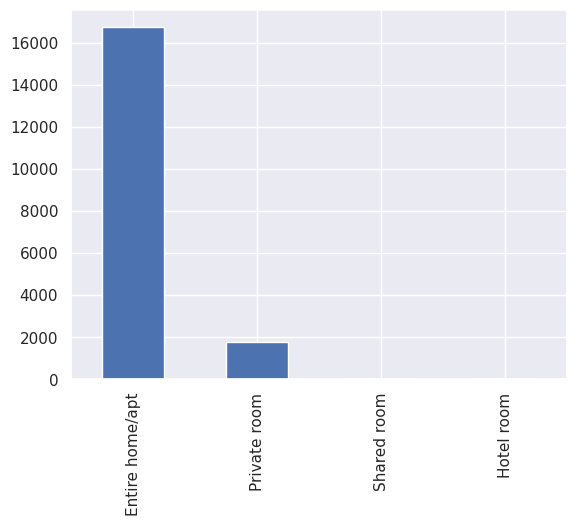

In [ ]:
data['room_type'].value_counts().plot(kind='bar')

In [ ]:
ColumnReport('accommodates')

badana kolumna:               accommodates
typ danych:                   int64
ilość NaN:                    0
procent NaN:                  0.0 %
liczba wartości unikalnych:   16
procent wartości unikalnych:  0.08627662442706929 %

losowo wybrane obserwacje:

[2 2 4]


In [ ]:
ColumnReport('bathrooms')
ColumnReport('bathrooms_text')
data['bathrooms_text'].value_counts()

badana kolumna:               bathrooms
typ danych:                   float64
ilość NaN:                    18545
procent NaN:                  100.0 %
liczba wartości unikalnych:   1
procent wartości unikalnych:  0.005392289026691831 %

losowo wybrane obserwacje:

[nan nan nan]
badana kolumna:               bathrooms_text
typ danych:                   object
ilość NaN:                    5
procent NaN:                  0.026961445133459154 %
liczba wartości unikalnych:   20
procent wartości unikalnych:  0.10784578053383662 %

losowo wybrane obserwacje:

['1 bath' '1 bath' '1 bath']


1 bath              14606
1.5 baths            1207
1 shared bath        1123
2 baths               968
1 private bath        196
Half-bath             113
2.5 baths             111
1.5 shared baths       88
2 shared baths         33
3 baths                32
0 baths                25
Shared half-bath       17
0 shared baths          8
3.5 baths               5
3 shared baths          3
4 baths                 2
4.5 shared baths        1
2.5 shared baths        1
5 baths                 1
Name: bathrooms_text, dtype: int64

In [ ]:
#wyciągnięcie liczby łazienek z kolumny opisowej łazienek i uzupełnienie o te wartości kolumny bathroom, połówki to łazienki częściowe tj np. WC + umywalka, każdy inny przypadek niż half opisane jest liczbą

data['bathrooms'] = np.where(data['bathrooms_text'].str.contains('half', case=False, na=False), 0.5, data['bathrooms_text'].str.split().str[0]).astype('float')

In [ ]:
ColumnReport('bedrooms')
ColumnReport('name')

badana kolumna:               bedrooms
typ danych:                   float64
ilość NaN:                    18545
procent NaN:                  100.0 %
liczba wartości unikalnych:   1
procent wartości unikalnych:  0.005392289026691831 %

losowo wybrane obserwacje:

[nan nan nan]
badana kolumna:               name
typ danych:                   object
ilość NaN:                    0
procent NaN:                  0.0 %
liczba wartości unikalnych:   4844
procent wartości unikalnych:  26.12024804529523 %

losowo wybrane obserwacje:

['Rental unit in Copenhagen · 1 bedroom · 1 bed · 1.5 baths'
 'Condo in Copenhagen · ★4.74 · 1 bedroom · 1 bed · 1 bath'
 'Home in Copenhagen · ★5.0 · 4 bedrooms · 6 beds · 2 baths']


In [ ]:
bedrooms_tmp = data['name'].str.split(pat=' bedroom', expand=True)[0]
bedrooms_tmp.str.get(-1).value_counts()

#ze sprawdzenia wynika, że 195 obserwacji przyjęło znak 'h', 17 znak 's' i 1 znak 'd',

1    10883
2     4525
3     2152
4      630
h      195
5      113
6       25
s       17
7        3
d        1
8        1
Name: 0, dtype: int64

In [ ]:
#sprawdzenie jak wyglądają pełne nazwy name dla w/w obserwacji z 'h', 's' i 'd'

pd.options.display.max_colwidth = 100
data[['name', 'beds']][(bedrooms_tmp.str.get(-1) == 'h') | (bedrooms_tmp.str.get(-1) == 's') | (bedrooms_tmp.str.get(-1) == 'd')].head(20)

#wynika z tego, że w dla tych obserwacji nie podano w nazwie liczby sypialni bedrooms
#można jednakowoż przyjąć, że apartamenty posiadające 1 łóżko bed będą miały maksymalnie jedną sypialnię bedroom

name  \
id                                                                                           
19135006             Townhouse in Frederiksberg · ★4.25 · Studio · 2 beds · 1 private bath   
34780788                               Rental unit in Copenhagen · Studio · 1 bed · 1 bath   
660706315648380811                  Condo in Copenhagen · ★4.25 · Studio · 2 beds · 1 bath   
36589031                       Rental unit in Copenhagen · ★4.80 · Studio · 1 bed · 1 bath   
25924311                       Rental unit in Copenhagen · ★4.77 · Studio · 1 bed · 1 bath   
1039219752764153142             Rental unit in Copenhagen · ★New · Studio · 1 bed · 1 bath   
53090313                             Condo in Copenhagen · ★4.92 · Studio · 1 bed · 1 bath   
37414095                           Condo in København K · ★4.67 · Studio · 2 beds · 1 bath   
51737948                Serviced apartment in Copenhagen · ★4.82 · Studio · 1 bed · 1 bath   
36068428                               Home in Copenhagen · ★5.0 · Studio · 1 bed · 1 bath   
963642198893684878                     Rental unit in Copenhagen · ★New · Studio · 0 baths   
44334837                      Rental unit in Copenhagen · ★4.89 · Studio · 2 beds · 1 bath   
26881098                      Rental unit in Copenhagen · ★4.90 · Studio · 2 beds · 1 bath   
935417                         Rental unit in Copenhagen · ★4.74 · Studio · 1 bed · 1 bath   
47879541                            Condo in Copenhagen · ★4.53 · Studio · 2 beds · 1 bath   
23929214                       Guesthouse in Copenhagen · ★4.93 · Studio · 2 beds · 1 bath   
699283197284181372                           Condo in Copenhagen · ★4.80 · Studio · 1 bath   
29098150                              Condo in Copenhagen · ★5.0 · Studio · 1 bed · 1 bath   
49894753                       Rental unit in Copenhagen · ★4.83 · Studio · 1 bed · 1 bath   
43887100                       Rental unit in Copenhagen · ★4.54 · Studio · 1 bed · 1 bath   

                     beds  
id                         
19135006              2.0  
34780788              1.0  
660706315648380811    2.0  
36589031              1.0  
25924311              1.0  
1039219752764153142   1.0  
53090313              1.0  
37414095              2.0  
51737948              1.0  
36068428              1.0  
963642198893684878    NaN  
44334837              2.0  
26881098              2.0  
935417                1.0  
47879541              2.0  
23929214              2.0  
699283197284181372    NaN  
29098150              1.0  
49894753              1.0  
43887100              1.0

In [ ]:
#sprawdzenie czy występuje w wartościach 0 w kolumnie beds, czy dałoby się zamienić wartości NaN na 0 i skonwertować kolumny bedrooms i beds na int

print(0 in data['beds'].values)

False


In [ ]:
#import danych o liczbie sypialni do kolumny bedrooms
data['bedrooms'] = bedrooms_tmp.str.get(-1)

In [ ]:
data['bedrooms'].value_counts()

#zamiana znaków na 0

for ch in ['h', 's', 'd']:
  data['bedrooms'].replace((ch), 0, inplace=True)

In [ ]:
# uzupełnienie wartości NaN wartością 1, o ile beds == 1

data['bedrooms'].loc[(data['bedrooms'] == 0) & (data['beds'] == 1)] = 1

<ipython-input-55-7e8aa3404d33>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['bedrooms'].loc[(data['bedrooms'] == 0) & (data['beds'] == 1)] = 1


In [ ]:
data['bedrooms'] = data['bedrooms'].astype(int)

In [ ]:
ColumnReport('beds')
data['beds'].value_counts()
data['name'].loc[data['beds'].isna()].head(20)

#niestety, wynika z tego, że nie ma informacji w kolumnie name dotycącą liczby łóżek
#wartości NaN zostaną zamienione na 0 i zamienione na typ int

data['beds'] = data['beds'].fillna(0)
data['beds'] = data['beds'].astype(int)

badana kolumna:               beds
typ danych:                   float64
ilość NaN:                    276
procent NaN:                  1.488271771366945 %
liczba wartości unikalnych:   14
procent wartości unikalnych:  0.07549204637368563 %

losowo wybrane obserwacje:

[1. 2. 3.]


In [ ]:
ColumnReport('amenities')
data['amenities'].value_counts()
data['amenities'].sample(30)

#kolumna amenities zawiera listy 0-elementowe dla 100% obserwacji, kolumna niestety kwalifikuje się do usunięcia

data.drop(columns=['amenities'], inplace=True)

badana kolumna:               amenities
typ danych:                   object
ilość NaN:                    0
procent NaN:                  0.0 %
liczba wartości unikalnych:   1
procent wartości unikalnych:  0.005392289026691831 %

losowo wybrane obserwacje:

['[]' '[]' '[]']


In [ ]:
ColumnReport('price')
data['price'].value_counts().head(30)

#typ string łatwy do skonwertowania na wartość liczbową - zdecydowano się użyć typu danych float, z uwagi na możliwe wystąpienia wartości ułamkowych

badana kolumna:               price
typ danych:                   object
ilość NaN:                    6349
procent NaN:                  34.235643030466434 %
liczba wartości unikalnych:   1782
procent wartości unikalnych:  9.609059045564843 %

losowo wybrane obserwacje:

['$1,950.00' '$500.00' nan]


$1,000.00    503
$1,200.00    466
$1,500.00    392
$1,100.00    357
$800.00      330
$900.00      309
$2,000.00    234
$750.00      232
$850.00      230
$950.00      229
$1,300.00    221
$1,400.00    206
$700.00      181
$1,250.00    158
$1,800.00    154
$600.00      152
$1,600.00    138
$500.00      110
$1,050.00    106
$1,150.00    102
$2,500.00    101
$1,700.00     90
$650.00       88
$550.00       77
$1,350.00     68
$2,200.00     65
$3,000.00     62
$450.00       61
$400.00       56
$1,900.00     52
Name: price, dtype: int64

In [ ]:
#wartość jest podana w koronach duńskich DKK, aktualny przelicznik DKK->USD 0.15, usunięcie znaku $ oraz przecinka jako separatora tysięcznego i zamiana na typ float

currency = 0.15

data['price'] = data['price'].str.replace('[$,]', '', regex=True).astype(float)
data['price'] = data['price'] * currency

In [ ]:
#wszystkie poniższe kolumny są poprawne pod kątem jakości i wydajności

ColumnReport('maximum_nights')
ColumnReport('minimum_minimum_nights')
ColumnReport('maximum_minimum_nights')
ColumnReport('minimum_maximum_nights')
ColumnReport('maximum_maximum_nights')
ColumnReport('maximum_maximum_nights')
ColumnReport('minimum_nights_avg_ntm')
ColumnReport('maximum_nights_avg_ntm')

badana kolumna:               maximum_nights
typ danych:                   int64
ilość NaN:                    0
procent NaN:                  0.0 %
liczba wartości unikalnych:   158
procent wartości unikalnych:  0.8519816662173092 %

losowo wybrane obserwacje:

[365   7  28]
badana kolumna:               minimum_minimum_nights
typ danych:                   int64
ilość NaN:                    0
procent NaN:                  0.0 %
liczba wartości unikalnych:   70
procent wartości unikalnych:  0.37746023186842814 %

losowo wybrane obserwacje:

[ 3 10  6]
badana kolumna:               maximum_minimum_nights
typ danych:                   int64
ilość NaN:                    0
procent NaN:                  0.0 %
liczba wartości unikalnych:   81
procent wartości unikalnych:  0.4367754111620383 %

losowo wybrane obserwacje:

[3 3 7]
badana kolumna:               minimum_maximum_nights
typ danych:                   int64
ilość NaN:                    0
procent NaN:                  0.0 %
liczba

In [ ]:
ColumnReport('has_availability')
data['has_availability'].value_counts()

#kolumna has_availability posiada powyżej 30% wartości pustych, teoretycznie powinna być w typie boolowskim ale do sprawdzenia potencjalne zależności z kolumnami availability_30 etc.

badana kolumna:               has_availability
typ danych:                   object
ilość NaN:                    6349
procent NaN:                  34.235643030466434 %
liczba wartości unikalnych:   3
procent wartości unikalnych:  0.016176867080075492 %

losowo wybrane obserwacje:

[nan 't' nan]


t    12158
f       38
Name: has_availability, dtype: int64

In [ ]:
data[['has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365']].loc[data['has_availability'] == 'f'].sort_values(['availability_365'], ascending=False)
data[['has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365']].loc[data['has_availability'] == 't'].sort_values(['availability_365'], ascending=False)
data[['has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365']].loc[data['has_availability'].isna()].sort_values(['availability_365'], ascending=False)

#z analizy powyższych wynika brak korelacji pomiędzy kolumną has_availability a pozostałymi, kolumna nie dostarczy nam zatem zbyt wielu danych - kolumnę usunięto

data.drop(columns=['has_availability'], inplace=True)

In [ ]:
ColumnReport('calendar_last_scraped')

#konwersja na typ datetime

data['calendar_last_scraped'] = data['calendar_last_scraped'].astype('datetime64[ns]')

badana kolumna:               calendar_last_scraped
typ danych:                   object
ilość NaN:                    0
procent NaN:                  0.0 %
liczba wartości unikalnych:   4
procent wartości unikalnych:  0.021569156106767323 %

losowo wybrane obserwacje:

['2023-12-29' '2024-01-03' '2023-12-29']


In [ ]:
ColumnReport('number_of_reviews')
ColumnReport('number_of_reviews_ltm')
ColumnReport('number_of_reviews_l30d')
ColumnReport('first_review')
ColumnReport('last_review')

### dodano kolumnę z końca, która również może współgrać z w/w

ColumnReport('reviews_per_month')

badana kolumna:               number_of_reviews
typ danych:                   int64
ilość NaN:                    0
procent NaN:                  0.0 %
liczba wartości unikalnych:   305
procent wartości unikalnych:  1.6446481531410084 %

losowo wybrane obserwacje:

[  1   9 103]
badana kolumna:               number_of_reviews_ltm
typ danych:                   int64
ilość NaN:                    0
procent NaN:                  0.0 %
liczba wartości unikalnych:   111
procent wartości unikalnych:  0.5985440819627932 %

losowo wybrane obserwacje:

[10  0 28]
badana kolumna:               number_of_reviews_l30d
typ danych:                   int64
ilość NaN:                    0
procent NaN:                  0.0 %
liczba wartości unikalnych:   20
procent wartości unikalnych:  0.10784578053383662 %

losowo wybrane obserwacje:

[0 0 0]
badana kolumna:               first_review
typ danych:                   object
ilość NaN:                    2401
procent NaN:                  12.946885953087

In [ ]:
print(len(data.loc[data['number_of_reviews'] == 0]))
print(len(data[['number_of_reviews', 'first_review', 'last_review', 'reviews_per_month']].loc[(data['first_review'].isna()) & (data['last_review'].isna()) & (data['reviews_per_month'].isna()) & (data['number_of_reviews'] == 0)]))

#kolumny first_review i last_review mają wartości NaN w sytuacji kiedy wartość == 0 w kolumnie number_of_reviews, innymi słowy nie ma daty recenzji skoro nie ma recenzji, tak samo nie ma recenzji średnio w miesiącu, bo jest 0 - wartość zatem powinna wynosić 0
#wartość NaN zostanie przyjęta jako 1900-01-01

data['first_review'].fillna('1900-01-01', inplace=True)
data['last_review'].fillna('1900-01-01', inplace=True)
data['reviews_per_month'].fillna(0, inplace=True)

data['first_review'] = data['first_review'].astype('datetime64[ns]')
data['last_review'] = data['last_review'].astype('datetime64[ns]')

2401
2401


In [ ]:
ColumnReport('review_scores_rating')
ColumnReport('review_scores_accuracy')
ColumnReport('review_scores_cleanliness')
ColumnReport('review_scores_checkin')
ColumnReport('review_scores_communication')
ColumnReport('review_scores_location')
ColumnReport('review_scores_value')

badana kolumna:               review_scores_rating
typ danych:                   float64
ilość NaN:                    2393
procent NaN:                  12.90374764087355 %
liczba wartości unikalnych:   123
procent wartości unikalnych:  0.6632515502830951 %

losowo wybrane obserwacje:

[5.    nan 4.57]
badana kolumna:               review_scores_accuracy
typ danych:                   float64
ilość NaN:                    2394
procent NaN:                  12.909139929900244 %
liczba wartości unikalnych:   118
procent wartości unikalnych:  0.636290105149636 %

losowo wybrane obserwacje:

[4.62 5.   4.44]
badana kolumna:               review_scores_cleanliness
typ danych:                   float64
ilość NaN:                    2394
procent NaN:                  12.909139929900244 %
liczba wartości unikalnych:   179
procent wartości unikalnych:  0.9652197357778378 %

losowo wybrane obserwacje:

[5.   4.76 4.71]
badana kolumna:               review_scores_checkin
typ danych:              

In [ ]:
len(data[['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']].loc[(data['review_scores_rating'].isna()) & (data['review_scores_accuracy'].isna()) & (data['review_scores_cleanliness'].isna()) & (data['review_scores_checkin'].isna()) & (data['review_scores_communication'].isna()) & (data['review_scores_location'].isna()) & (data['review_scores_value'].isna())])

#stwierdzono, że brakujące wartości w kolumnach dot. rankingów występują dla tych samych obserwacji - w przybliżeniu, pozostawiono póki co (do uzupełnienia w późniejszym etapie)

2393

In [ ]:
ColumnReport('instant_bookable')

# konwersja na typ bool

data['instant_bookable'] = data['instant_bookable'].map({'t':True, 'f':False})
data['instant_bookable'] = data['instant_bookable'].astype(bool)

badana kolumna:               instant_bookable
typ danych:                   object
ilość NaN:                    0
procent NaN:                  0.0 %
liczba wartości unikalnych:   2
procent wartości unikalnych:  0.010784578053383662 %

losowo wybrane obserwacje:

['f' 'f' 'f']


In [ ]:
ColumnReport('calculated_host_listings_count')
ColumnReport('calculated_host_listings_count_entire_homes')
ColumnReport('calculated_host_listings_count_private_rooms')
ColumnReport('calculated_host_listings_count_shared_rooms')

badana kolumna:               calculated_host_listings_count
typ danych:                   int64
ilość NaN:                    0
procent NaN:                  0.0 %
liczba wartości unikalnych:   21
procent wartości unikalnych:  0.11323806956052844 %

losowo wybrane obserwacje:

[2 1 1]
badana kolumna:               calculated_host_listings_count_entire_homes
typ danych:                   int64
ilość NaN:                    0
procent NaN:                  0.0 %
liczba wartości unikalnych:   22
procent wartości unikalnych:  0.11863035858722029 %

losowo wybrane obserwacje:

[1 0 1]
badana kolumna:               calculated_host_listings_count_private_rooms
typ danych:                   int64
ilość NaN:                    0
procent NaN:                  0.0 %
liczba wartości unikalnych:   12
procent wartości unikalnych:  0.06470746832030197 %

losowo wybrane obserwacje:

[0 0 0]
badana kolumna:               calculated_host_listings_count_shared_rooms
typ danych:                   int64
il

##Uzupełnienie lub usunięcie brakujących danych

In [ ]:
#### kolejnym krokiem będzie manipulowanie danymi w celu uzupełnienia wartości NaN lub pozbycie się ich - w zależności od przypadku,
#jeszcze raz wyświetlono kolumny z procentowym udziałem wartości nullowych

empties = data.isna().sum() / len(data)
empties.sort_values(ascending=False).loc[empties > 0.0] * 100

price                          34.235643
host_acceptance_rate           17.034241
host_location                  15.227824
review_scores_location         12.925317
review_scores_checkin          12.909140
review_scores_value            12.909140
review_scores_accuracy         12.909140
review_scores_cleanliness      12.909140
review_scores_communication    12.909140
review_scores_rating           12.903748
bathrooms_text                  0.026961
bathrooms                       0.026961
host_picture_url                0.005392
host_since                      0.005392
host_name                       0.005392
host_verifications              0.005392
host_thumbnail_url              0.005392
dtype: float64

In [ ]:
data.loc[data['host_name'].isna()]

#po wejściu w link do ogłoszenia i próba odszukania informacji o hoście kończy się błędem strony, zatem braki danych wynikają najpewniej z jakiegoś niedopatrzenia po stronie AirBnB - obserwacja do usunięcia

data = data.drop(data.loc[data['host_name'].isna()].index)

In [ ]:
len(data.loc[data['bathrooms'].isna()])

# jest tylko 5 obserwacji z brakiem liczby bathroom, uzupełnione zostaną wartością najczęściej występującą

print(data['bathrooms'].describe())
print(data['bathrooms'].median())

# najczęściej występującą daną jest 1.0, zatem tą wartością zostanie uzupełniona kolumna bathrooms

data['bathrooms'].fillna(data['bathrooms'].median(), inplace=True)

count    18539.000000
mean         1.097875
std          0.301232
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          5.000000
Name: bathrooms, dtype: float64
1.0


In [ ]:
#sprawdzenie najczęściej występujących wartości w 'bathrooms_text dla bathroom == 1 i uzupełnienie braków tą wartością

data['bathrooms_text'].loc[data['bathrooms'] == 1.0].value_counts()
data['bathrooms_text'].fillna('1 bath', inplace=True)

In [ ]:
#oceny rankingowe, ogląd danych
data[['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']].describe()

review_scores_rating  review_scores_accuracy  \
count          16152.000000            16151.000000   
mean               4.818393                4.839057   
std                0.285395                0.270839   
min                0.000000                0.000000   
25%                4.750000                4.780000   
50%                4.900000                4.920000   
75%                5.000000                5.000000   
max                5.000000                5.000000   

       review_scores_cleanliness  review_scores_checkin  \
count               16151.000000           16151.000000   
mean                    4.694532               4.872860   
std                     0.391467               0.257222   
min                     0.000000               0.000000   
25%                     4.560000               4.830000   
50%                     4.800000               4.960000   
75%                     5.000000               5.000000   
max                     5.080000               5.000000   

       review_scores_communication  review_scores_location  \
count                 16151.000000            16148.000000   
mean                      4.910766                4.834828   
std                       0.220142                0.240718   
min                       1.000000                1.000000   
25%                       4.900000                4.750000   
50%                       5.000000                4.910000   
75%                       5.000000                5.000000   
max                       5.000000                5.000000   

       review_scores_value  
count         16151.000000  
mean              4.711502  
std               0.323803  
min               1.000000  
25%               4.600000  
50%               4.770000  
75%               4.940000  
max               5.000000

In [ ]:
#zdecydowano się na uzupełnienie braków z każdej z w/w kolumn medianą wartości danej kolumny

for C in ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']:
  data[C].fillna(data[C].median(), inplace=True)

In [ ]:
data['host_location'].value_counts()

#data['host_location'].isin(['Denmark']).sum()

print('host in Copenhagen: ',(data['host_location'].dropna().str.contains("Copenhagen").sum()) / len(data['host_location'].dropna()))
print('host in Denmark:    ',(data['host_location'].dropna().str.contains("Denmark").sum()) / len(data['host_location'].dropna()))

#analizując kilka najczęściej występujących wartości uznano, że 85% hostów pochodzi z Kopenhagi, natomiast ponad 98% z Danii, zdecydowano się uzupełnić wartością 'Denmark'

data['host_location'].fillna('Denmark', inplace=True)

host in Copenhagen:  0.850200368933274
host in Denmark:     0.982316646523758


In [ ]:
data[['host_acceptance_rate']].describe()

#uzupełnienie braków wartością mediany
#data['host_acceptance_rate'].fillna(data['host_acceptance_rate'].median(), inplace=True)

data['host_acceptance_rate'].fillna(data['host_acceptance_rate'].median(), inplace=True)

In [ ]:
### funkcja do usuwania outlierów zwracająca cały zbiór danych już z usuniętymi outlierami z podanej kolumny

def GetRidOfOutliers(whole_data, column_with_outliers):
  Q1 = whole_data[column_with_outliers].quantile(0.25)
  Q3 = whole_data[column_with_outliers].quantile(0.75)
  IOR = Q3 - Q1
  lower_lim = Q1 - 1.5 * IOR
  upper_lim = Q3 + 1.5 * IOR
  outliers_low = (whole_data[column_with_outliers] < lower_lim)
  outliers_up = (whole_data[column_with_outliers] > upper_lim)
  return whole_data[-(outliers_low | outliers_up)]

In [ ]:
GetRidOfOutliers(data, 'price')['price'].describe()

count    11547.000000
mean       170.150779
std         69.920344
min         18.750000
25%        120.000000
50%        157.500000
75%        210.000000
max        375.150000
Name: price, dtype: float64

<Axes: xlabel='room_type', ylabel='price'>

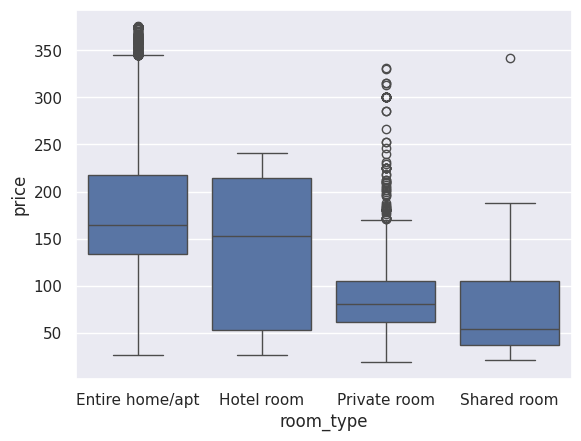

In [ ]:
### uzupełnienie Price ###

data['price'].describe()

#wykres pudełkowy z pozbyciem się outlierów z kolumny price

sns.boxplot(GetRidOfOutliers(data, 'price'), x='room_type', y='price')

#zdecydowano się nie uzupełniać wartości w kolumnie Price
#34% wartości to bardzo duży udział, można byłoby spróbować przeprowadzić głębszą analizę danych
#przy użyciu kombinacji metod uczenia maszynowego (regresji, lasu losowego, PCA) w celu próby przewidzenia wartości
#na podstawie innych danych, ale nie zdecydowano się tutaj na taki krok

# 4. Badanie zależności pomiędzy zmiennymi

##Spojrzenie na dane po ich edycji

In [ ]:
### ANALIZA DANYCH ###

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18544 entries, 772195193586734462 to 899770214952158073
Data columns (total 61 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   listing_url                                   18544 non-null  object        
 1   last_scraped                                  18544 non-null  datetime64[ns]
 2   source                                        18544 non-null  category      
 3   name                                          18544 non-null  object        
 4   picture_url                                   18544 non-null  object        
 5   host_id                                       18544 non-null  int64         
 6   host_url                                      18544 non-null  object        
 7   host_name                                     18544 non-null  object        
 8   host_since                          

In [ ]:
data.describe(include=np.number)

host_id  host_acceptance_rate  host_listings_count  \
count  1.854400e+04          18544.000000         18544.000000   
mean   1.306614e+08              0.732904             5.643658   
std    1.560768e+08              0.287389            35.369401   
min    5.130000e+02              0.000000             1.000000   
25%    1.634096e+07              0.590000             1.000000   
50%    5.799651e+07              0.820000             1.000000   
75%    1.876103e+08              1.000000             1.000000   
max    5.525667e+08              1.000000           814.000000   

       host_total_listings_count      latitude     longitude  accommodates  \
count               18544.000000  18544.000000  18544.000000  18544.000000   
mean                   11.733175     55.680349     12.558486      3.326197   
std                    81.607273      0.019161      0.031341      1.650989   
min                     1.000000     55.615890     12.454000      1.000000   
25%                     1.000000     55.666250     12.540836      2.000000   
50%                     1.000000     55.681421     12.555170      3.000000   
75%                     2.000000     55.695613     12.580360      4.000000   
max                  1836.000000     55.732470     12.639720     16.000000   

          bathrooms      bedrooms          beds         price  minimum_nights  \
count  18544.000000  18544.000000  18544.000000  12195.000000    18544.000000   
mean       1.097848      1.607151      1.879584    197.159582        4.555382   
std        0.301196      0.887913      1.273903    228.133118       18.812694   
min        0.000000      0.000000      0.000000     18.750000        1.000000   
25%        1.000000      1.000000      1.000000    123.750000        2.000000   
50%        1.000000      1.000000      1.000000    165.000000        3.000000   
75%        1.000000      2.000000      2.000000    225.000000        4.000000   
max        5.000000      8.000000     14.000000  15000.000000     1122.000000   

       maximum_nights  minimum_minimum_nights  maximum_minimum_nights  \
count    18544.000000            18544.000000            18544.000000   
mean       400.228969                4.302092                4.971689   
std        451.364019               17.512107               18.624541   
min          1.000000                1.000000                1.000000   
25%         20.000000                2.000000                2.000000   
50%        365.000000                3.000000                3.000000   
75%       1125.000000                4.000000                4.000000   
max       4000.000000             1122.000000             1122.000000   

       minimum_maximum_nights  maximum_maximum_nights  minimum_nights_avg_ntm  \
count            18544.000000            18544.000000            18544.000000   
mean               485.494230              493.345557                4.653473   
std                482.943581              483.906229               18.049277   
min                  1.000000                1.000000                1.000000   
25%                 21.000000               22.000000                2.000000   
50%                365.000000              365.000000                3.000000   
75%               1125.000000             1125.000000                4.000000   
max               4000.000000             4000.000000             1122.000000   

       maximum_nights_avg_ntm  availability_30  availability_60  \
count            18544.000000     18544.000000     18544.000000   
mean               487.652421         6.895923        15.553764   
std                482.130796        10.517272        22.110071   
min                  1.000000         0.000000         0.000000   
25%                 22.000000         0.000000         0.000000   
50%                365.000000         0.000000         0.000000   
75%               1125.000000        13.000000        30.000000   
max               4000.000000        30.000000        60.000

##Ogólna macierz korelacji Pearsona

<Axes: >

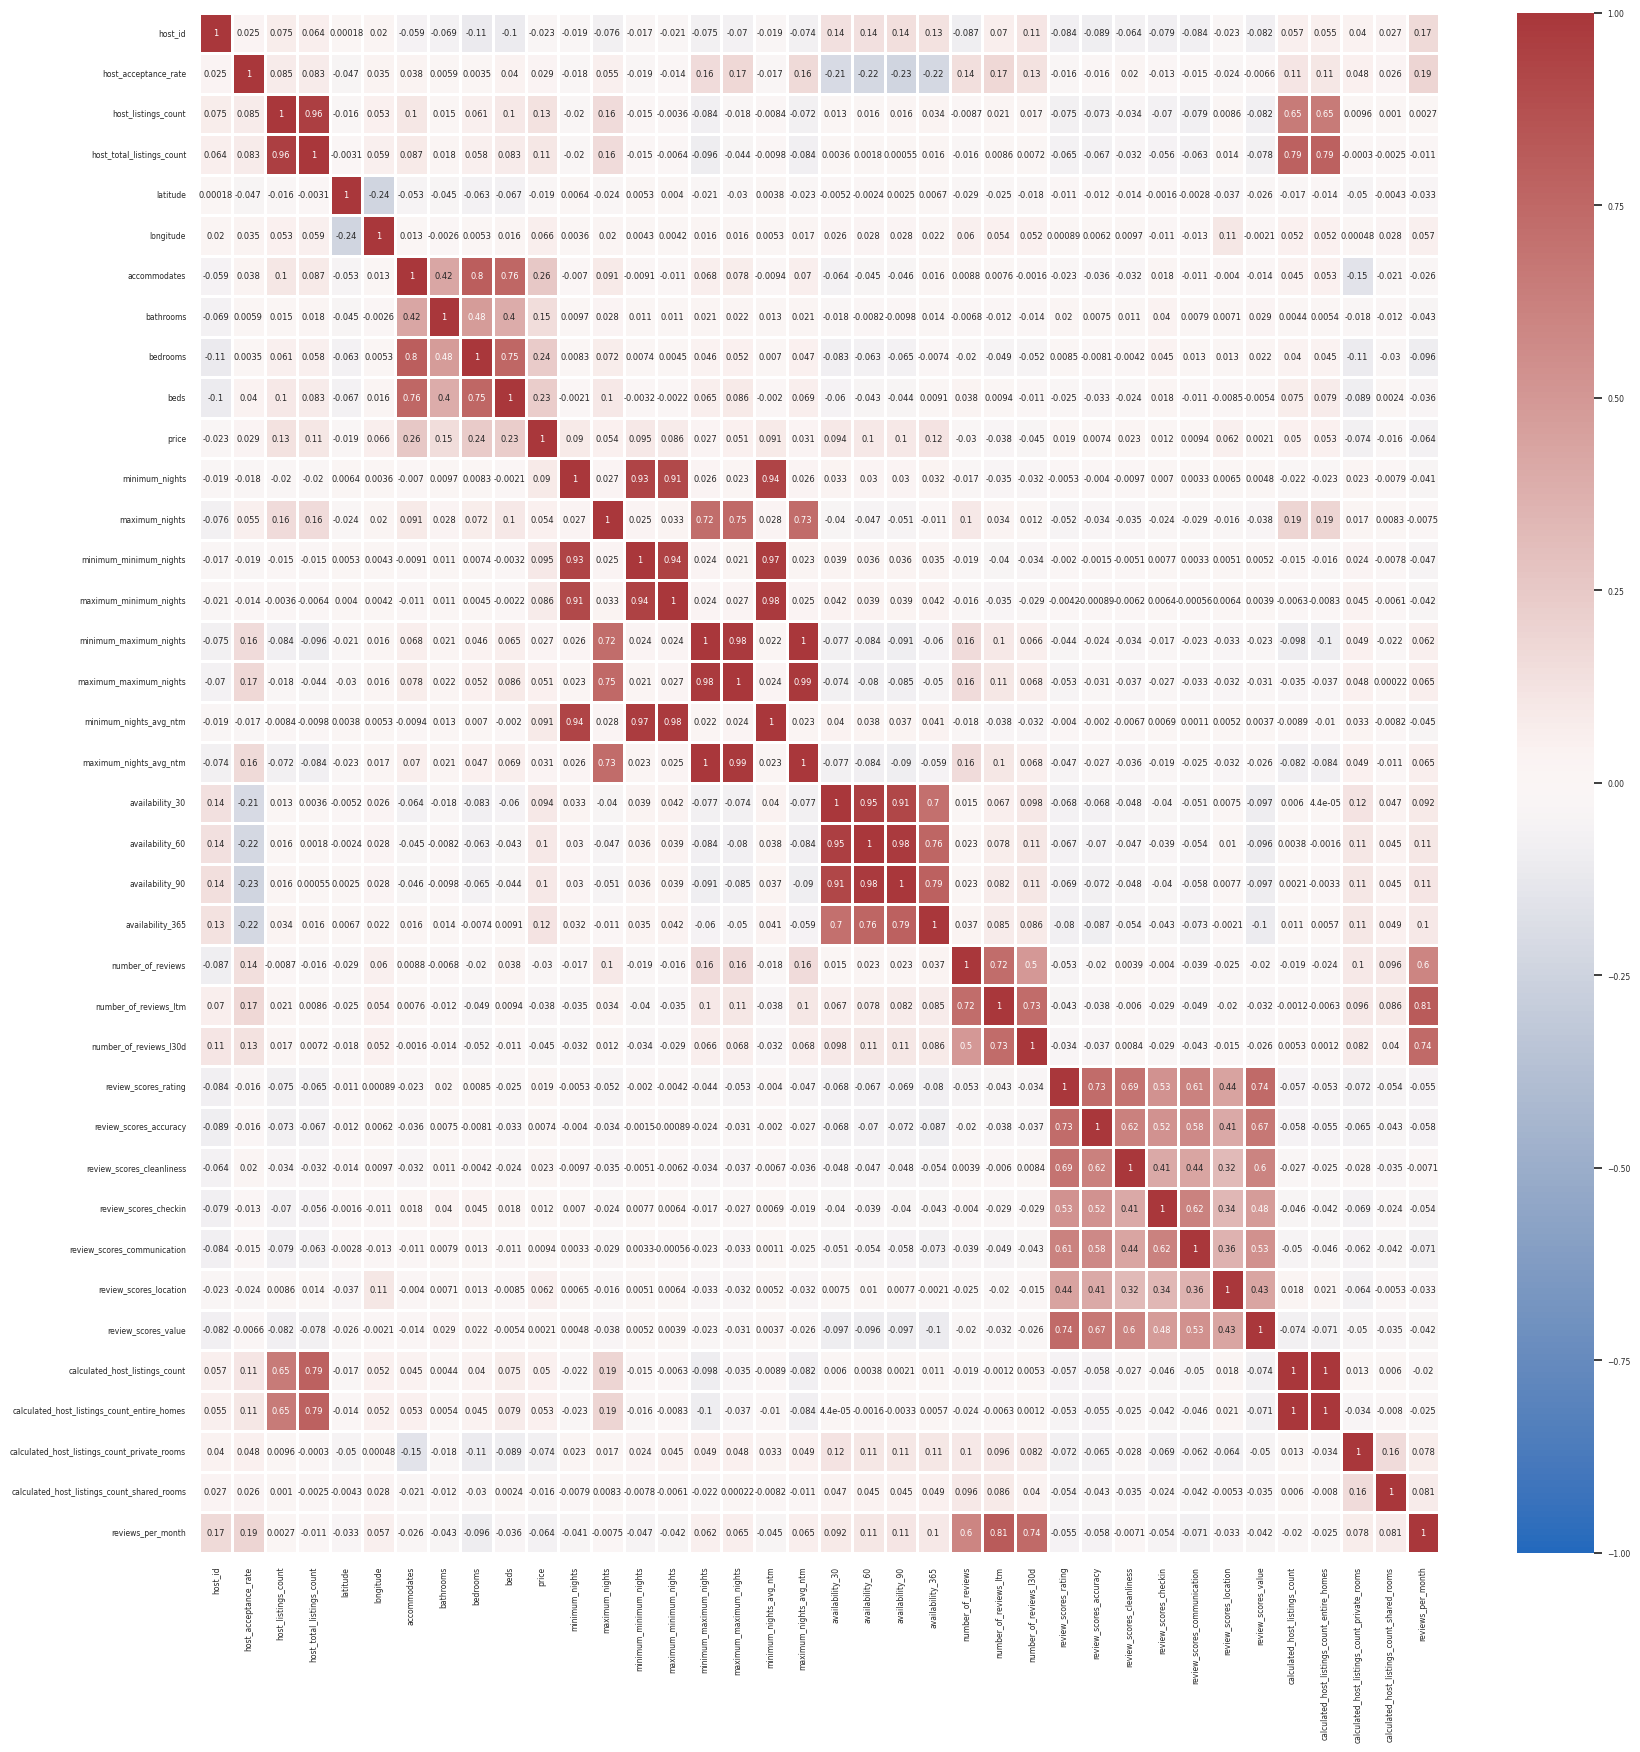

In [ ]:
#wyplotowano ogólną macierz pearsona ze wszystkich kolumn z danymi numerycznymi, aby zauważyć sektory o większej korelacji, którymi się można przyjrzeć bliżej

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
corr = data.select_dtypes(include=numerics).corr(method='pearson', min_periods=1, numeric_only=True)
plt.figure(figsize=(20, 20))
sns.set(font_scale=0.5)
sns.heatmap(corr, annot=True, cmap='vlag', vmin=-1, vmax=1, linewidths=1)

##Ogólna macierz korelacji Pearsona

<Axes: >

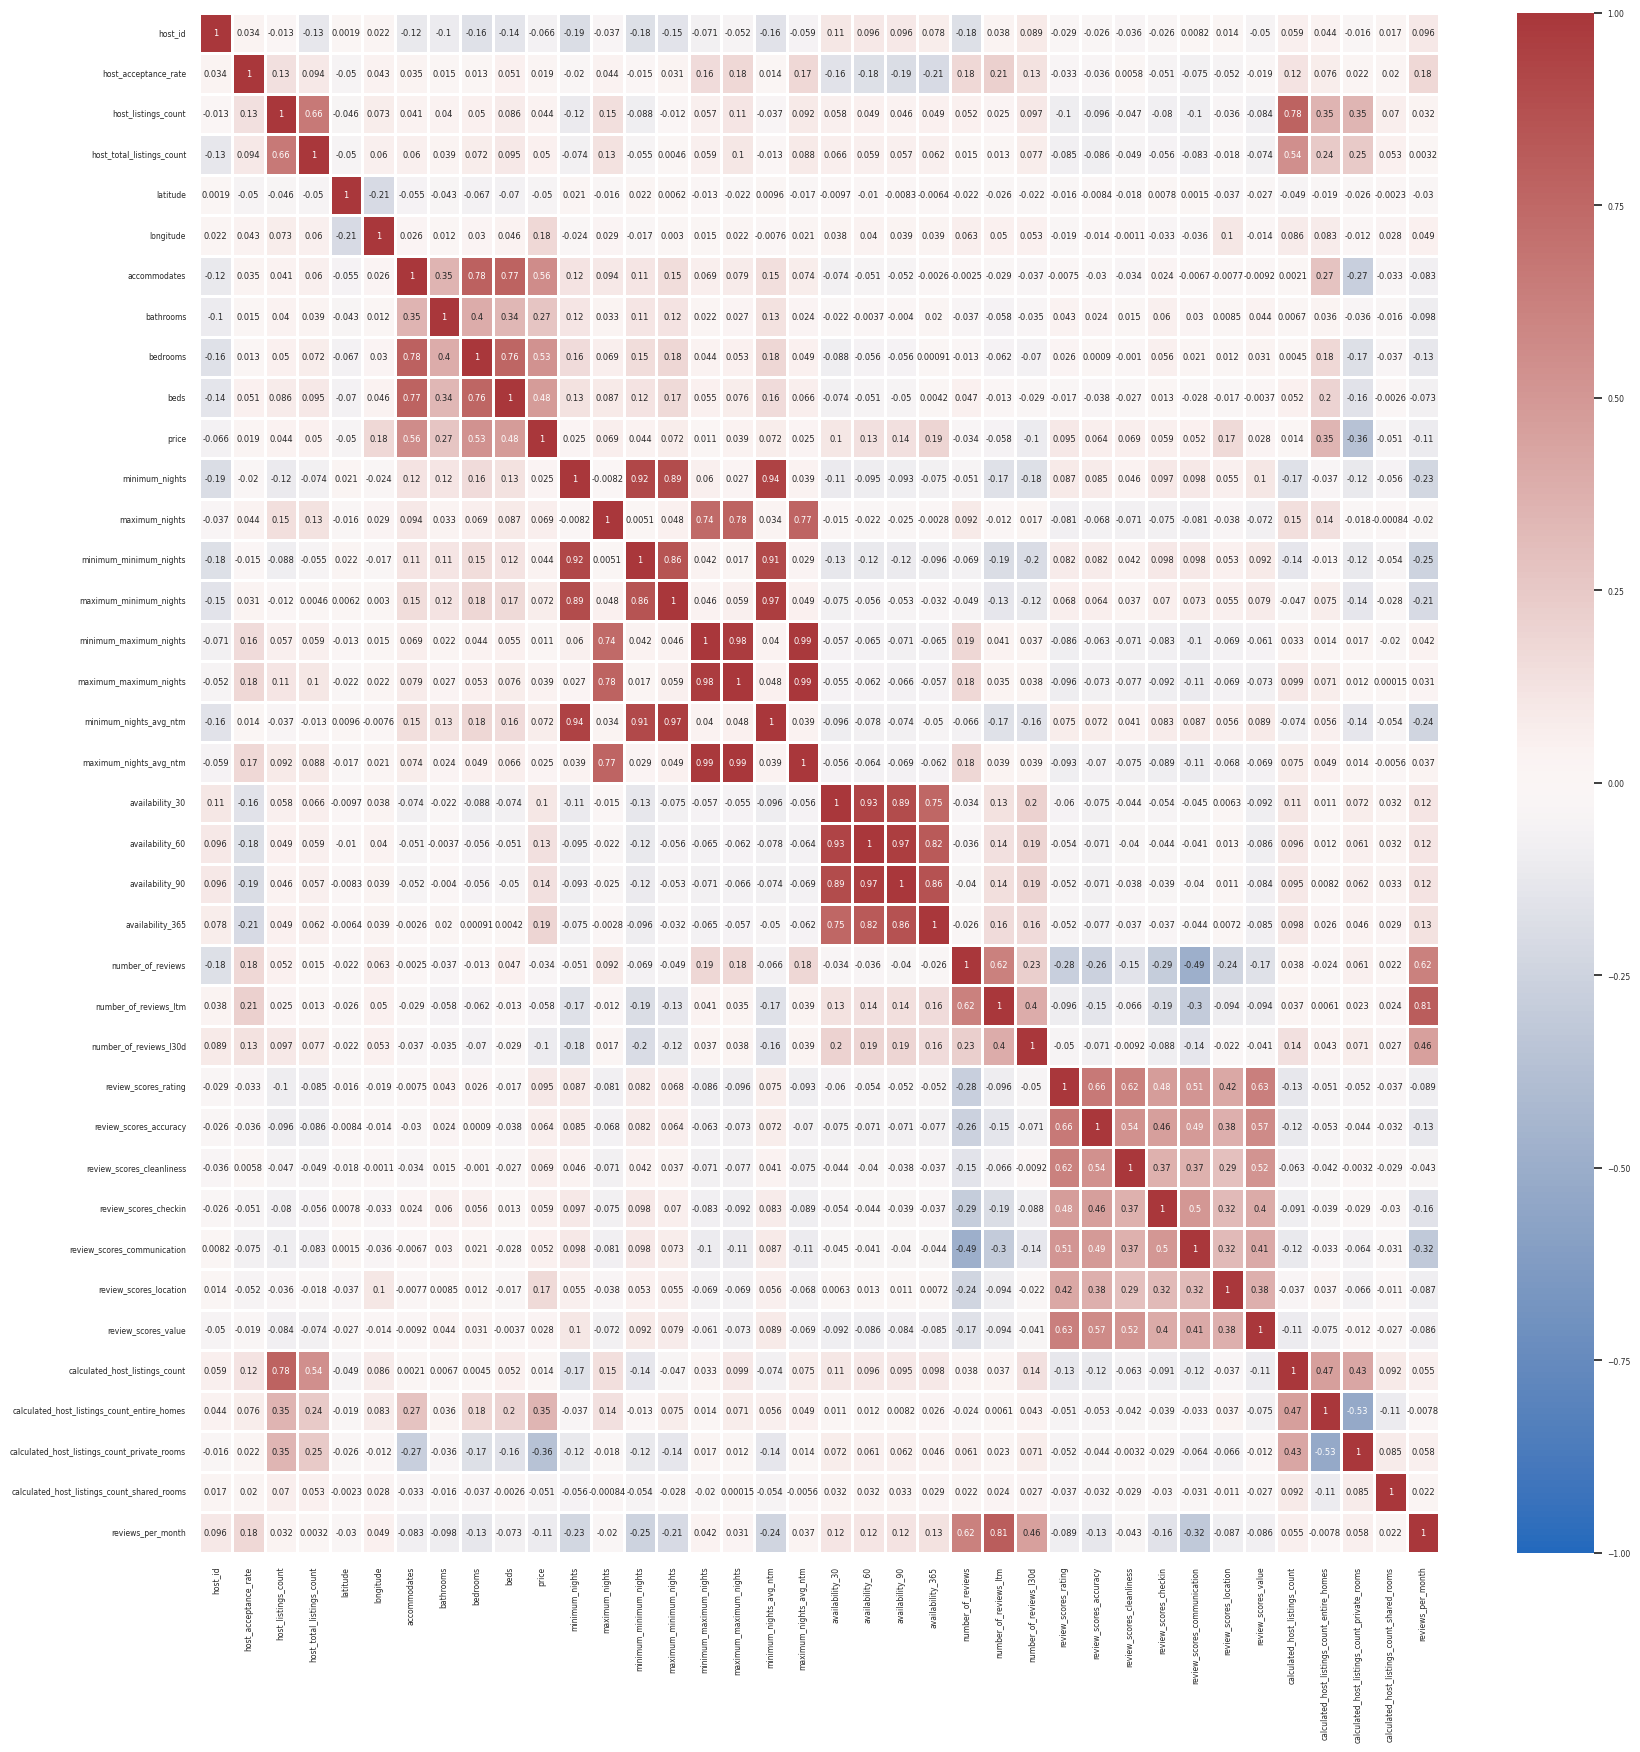

In [ ]:
corr = data.select_dtypes(include=numerics).corr(method='spearman', min_periods=1, numeric_only=True)
plt.figure(figsize=(20, 20))
sns.set(font_scale=0.5)
sns.heatmap(corr, annot=True, cmap='vlag', vmin=-1, vmax=1, linewidths=1)

##Wstępne obserwacje

In [ ]:
'''
co zostało zauważone:

1) korelacja pomiędzy kolumnami dotyczącymi liczby ofert danego hosta - do zbadania
2) korelacja pomiędzy wartościami dotyczącymi cech lokalu: liczba miejsc zakwaterowania, liczba łóżek, łazienek, sypialni,
co ciekawe występuje niewielka zależność również pomiędzy ceną a liczbą wszystkich wynajmowanych przez hosta apartamentów i prywatnych pokoi w Kopenhadze - do zbadania
3) kolejny sektor korelacji zawiera kolumny dotyczące warunków rezerwacji (kolumny maximum_nights etc.) - skorelowane ze sobą w sposób naturalny, bez dalszego badania
4) kolejny sektor to kolumny dotyczące dostępności lokalu do wynajęcia, korelacja występuje również ze wskaźnikiem akceptacji rezerwacji przez hosta  - skorelowane ze sobą w sposób naturalny, bez dalszego badania
5) sektor danych związanych z recenzjami, co ciekawe występuje korelacja ujemna z niektórymi aspektami systemu oceny, do przyjrzenia się bliżej - do zbadania
6) coś, co nie wynika z macierzy korelacji, ale jest czymś naturalnym, to korelacja pomiędzy współrzędnymi a dzielnicą - do zbadania
'''

'\nco zostało zauważone:\n\n1) korelacja pomiędzy kolumnami dotyczącymi liczby ofert danego hosta - do zbadania\n2) korelacja pomiędzy wartościami dotyczącymi cech lokalu: liczba miejsc zakwaterowania, liczba łóżek, łazienek, sypialni,\nco ciekawe występuje niewielka zależność również pomiędzy ceną a liczbą wszystkich wynajmowanych przez hosta apartamentów i prywatnych pokoi w Kopenhadze - do zbadania\n3) kolejny sektor korelacji zawiera kolumny dotyczące warunków rezerwacji (kolumny maximum_nights etc.) - skorelowane ze sobą w sposób naturalny, bez dalszego badania\n4) kolejny sektor to kolumny dotyczące dostępności lokalu do wynajęcia, korelacja występuje również ze wskaźnikiem akceptacji rezerwacji przez hosta  - skorelowane ze sobą w sposób naturalny, bez dalszego badania\n5) sektor danych związanych z recenzjami, co ciekawe występuje korelacja ujemna z niektórymi aspektami systemu oceny, do przyjrzenia się bliżej - do zbadania\n6) coś, co nie wynika z macierzy korelacji, ale jest 

##Dane dotyczące liczby ofert

<Axes: >

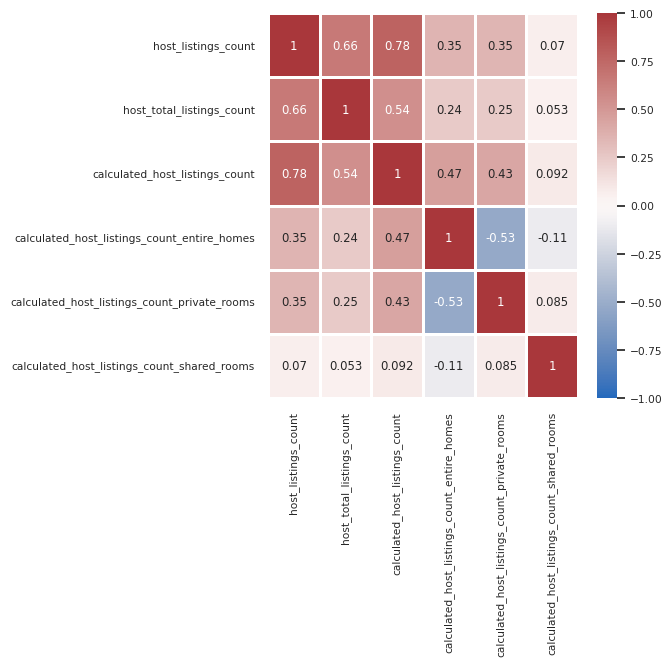

In [ ]:
data_listning = data[['host_listings_count', 'host_total_listings_count', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms']]
sns.set_theme(style="white")
corr = data_listning.corr(method='spearman', min_periods=1, numeric_only=True)
plt.figure(figsize=(5, 5))
sns.set(font_scale=0.7)
sns.heatmap(corr, annot=True, cmap='vlag', vmin=-1, vmax=1, linewidths=1)

<Figure size 600x600 with 0 Axes>

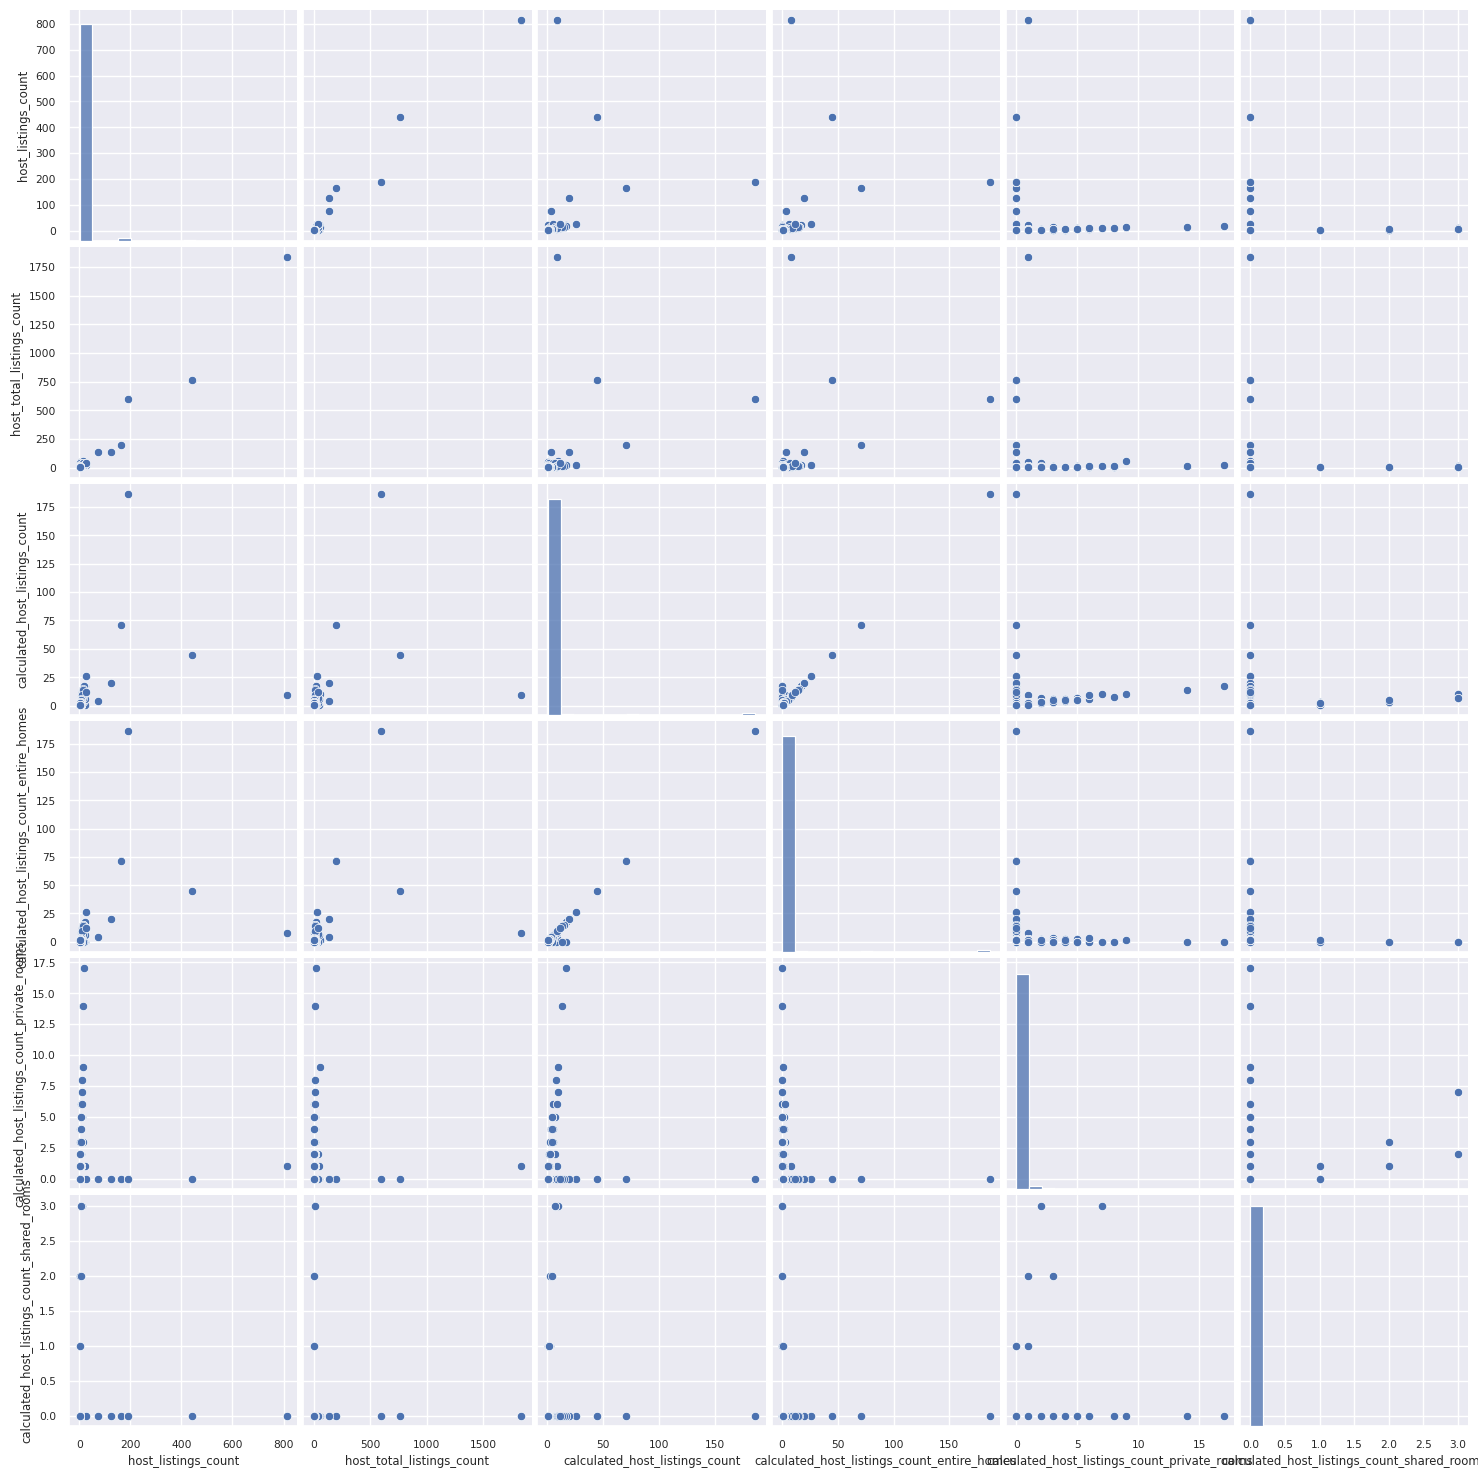

In [ ]:
plt.figure(figsize=(6, 6))
sns.pairplot(data_listning)


##Dane dotyczące charakterystyki lokalu

<Axes: >

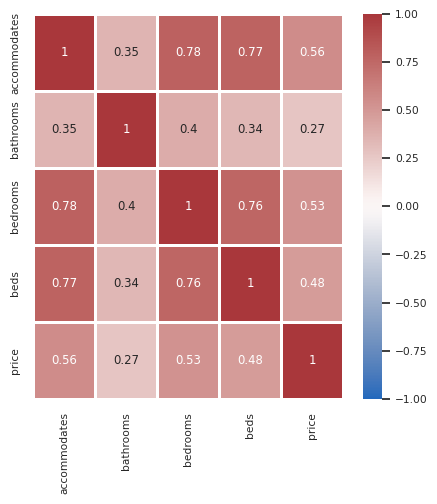

In [ ]:
data_character = data[['accommodates', 'bathrooms', 'bedrooms', 'beds', 'price']]
#data_character = GetRidOfOutliers(data_character, 'price')

corr = data[['accommodates', 'bathrooms', 'bedrooms', 'beds', 'price']].corr(method='spearman', min_periods=1, numeric_only=True)
plt.figure(figsize=(5, 5))
sns.set(font_scale=0.7)
sns.heatmap(corr, annot=True, cmap='vlag', vmin=-1, vmax=1, linewidths=1)

<Axes: >

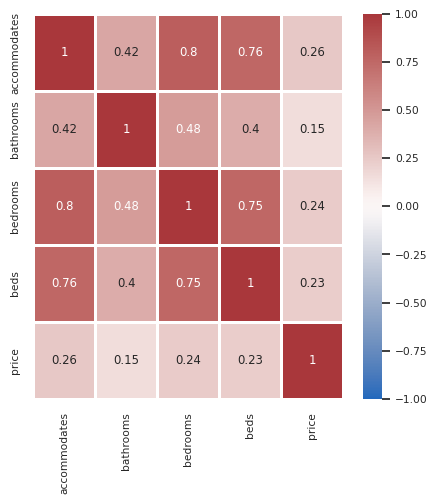

In [ ]:
corr = data_character.corr(method='pearson', min_periods=1, numeric_only=True)
plt.figure(figsize=(5, 5))
sns.set(font_scale=0.7)
sns.heatmap(corr, annot=True, cmap='vlag', vmin=-1, vmax=1, linewidths=1)

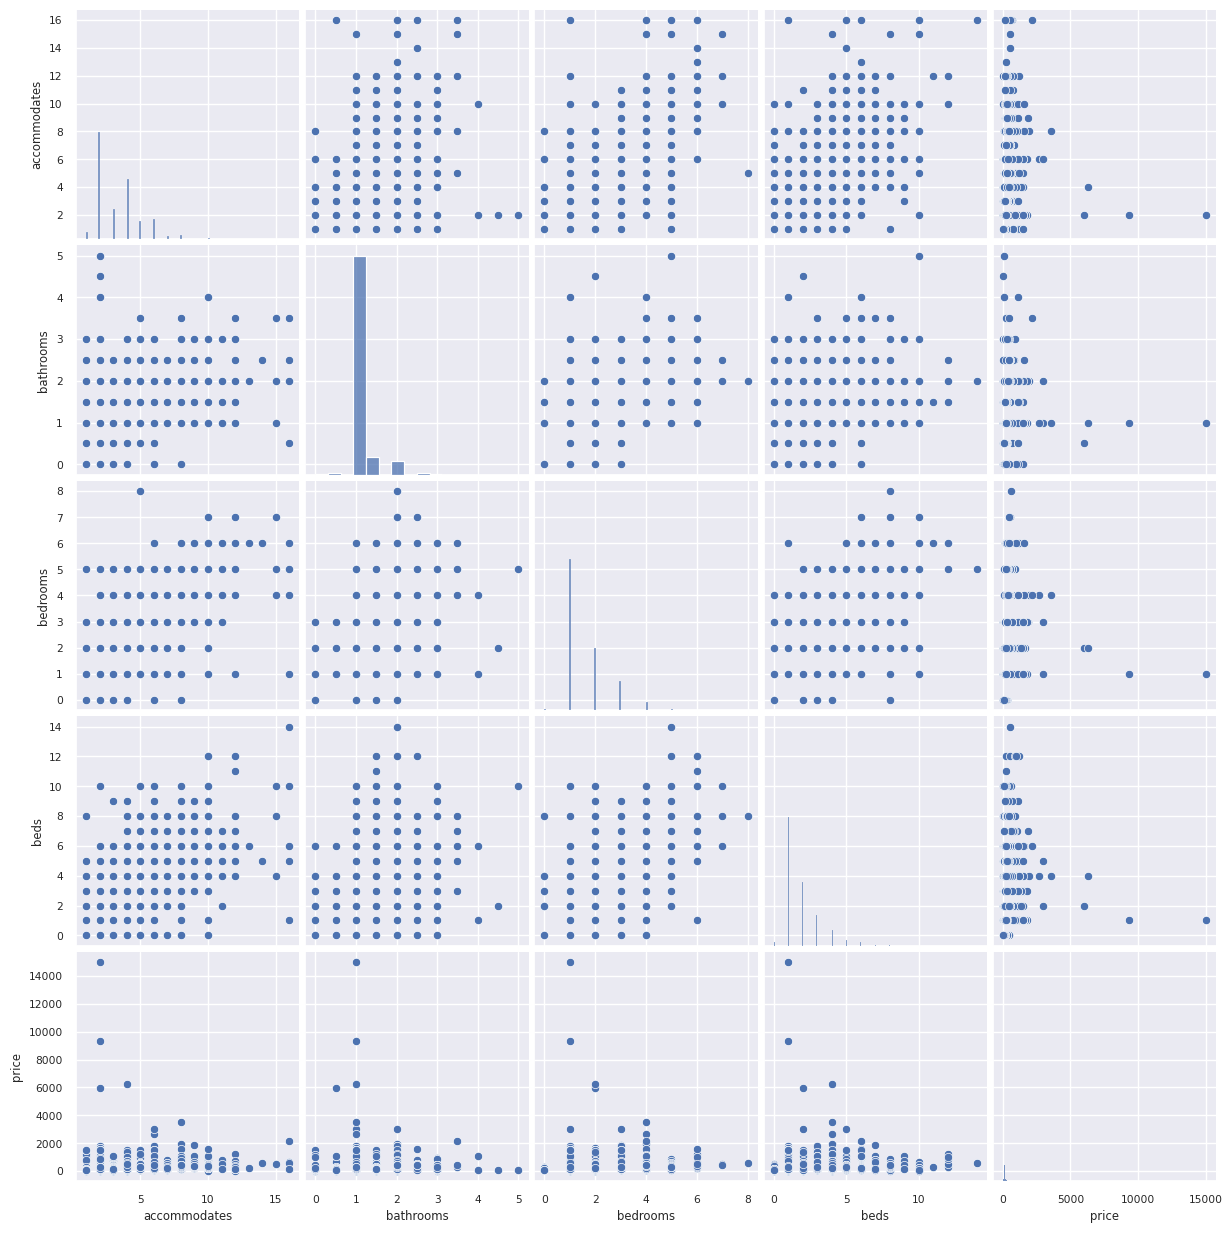

In [ ]:
sns.pairplot(data_character)

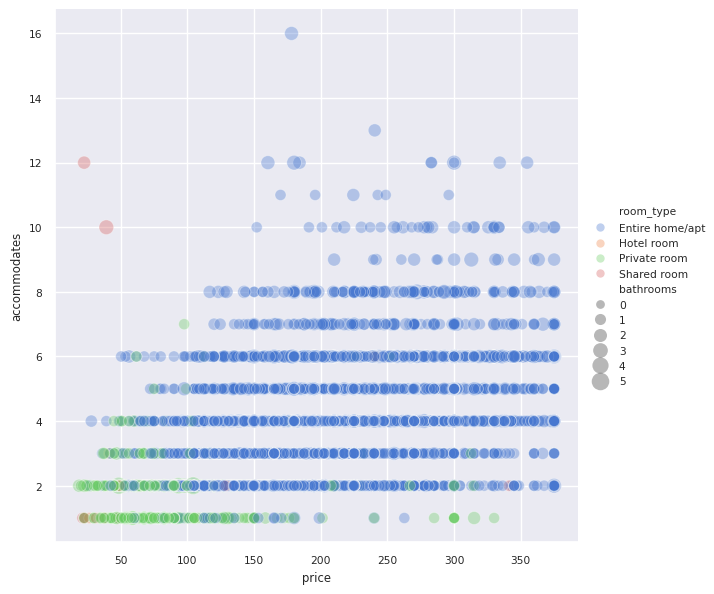

In [ ]:
sns.relplot(x="price", y="accommodates", hue="room_type", size='bathrooms',
            alpha=0.35, palette="muted", sizes=(40,160),
            height=6, data=GetRidOfOutliers(data, 'price'))

#na wykresie widać, że prywatne pokoje charakteryzują się mniejszą ceną za wynajem niż całe apartamenty

##Dane dotyczące ocen lokalu

<Axes: >

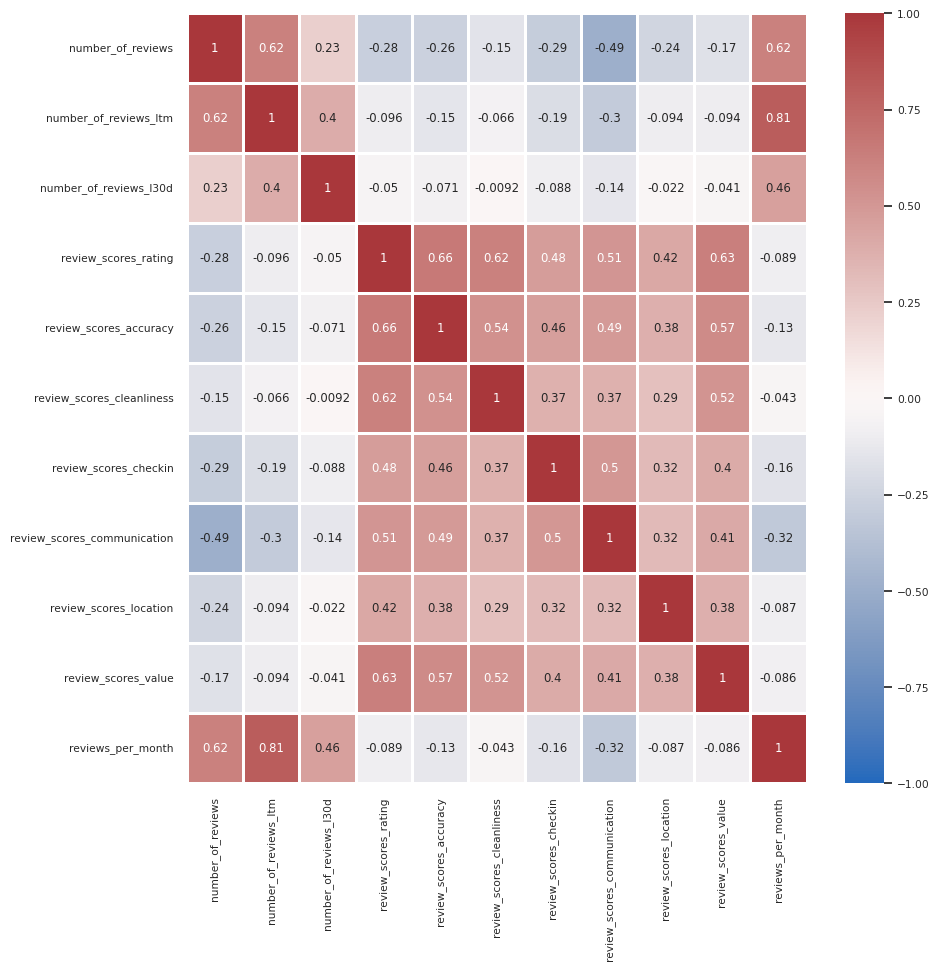

In [ ]:
# 3) korelacja pomiędzy ilością, a jakością

data_review = data[[
'number_of_reviews',
'number_of_reviews_ltm',
'number_of_reviews_l30d',
'review_scores_rating',
'review_scores_accuracy',
'review_scores_cleanliness',
'review_scores_checkin',
'review_scores_communication',
'review_scores_location',
'review_scores_value',
'reviews_per_month'
]]

corr = data_review.corr(method='spearman', min_periods=1, numeric_only=True)
plt.figure(figsize=(10, 10))
sns.set(font_scale=0.7)
sns.heatmap(corr, annot=True, cmap='vlag', vmin=-1, vmax=1, linewidths=1)

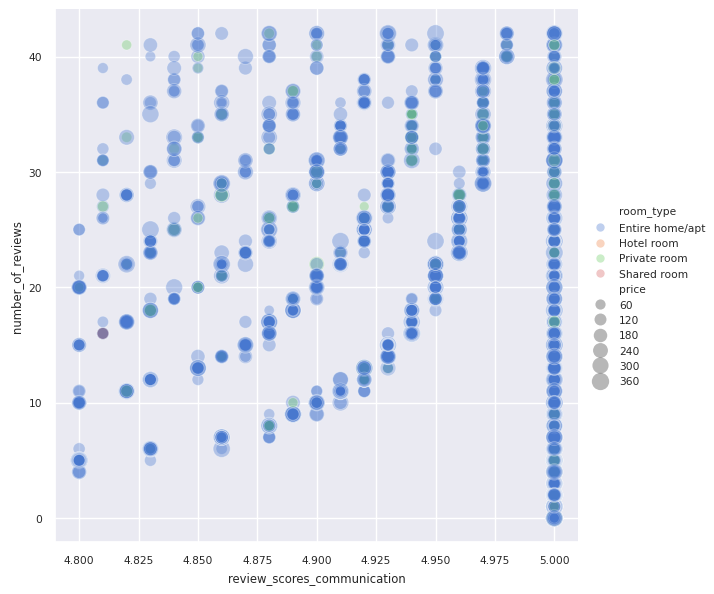

In [ ]:
sns.relplot(x='review_scores_communication', y='number_of_reviews', hue="room_type", size='price',
            alpha=0.35, palette="muted", sizes=(40,160),
            height=6, data=GetRidOfOutliers(GetRidOfOutliers(GetRidOfOutliers(data, 'review_scores_communication'), 'price'), 'number_of_reviews'))

#ciekawa zależność pomiędzy całkowitą liczbą recenzji a oceną za komunikację, widać na wykresie naturalne układające się linie trendu, których charakteru jednak nie udało się sprecyzować
#nie udało się odszukać zmiennej, która precyzowałaby którą z kilku linii trendów powinno się uwzględnić

<Axes: xlabel='review_scores_communication', ylabel='number_of_reviews'>

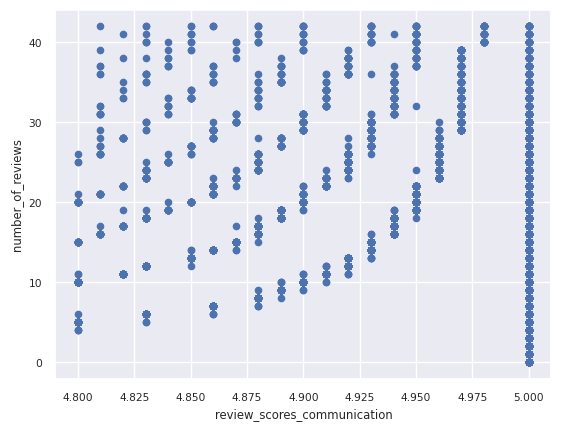

In [ ]:
GetRidOfOutliers(GetRidOfOutliers(GetRidOfOutliers(data, 'review_scores_communication'), 'price'), 'number_of_reviews').plot(kind='scatter', x='review_scores_communication', y='number_of_reviews')

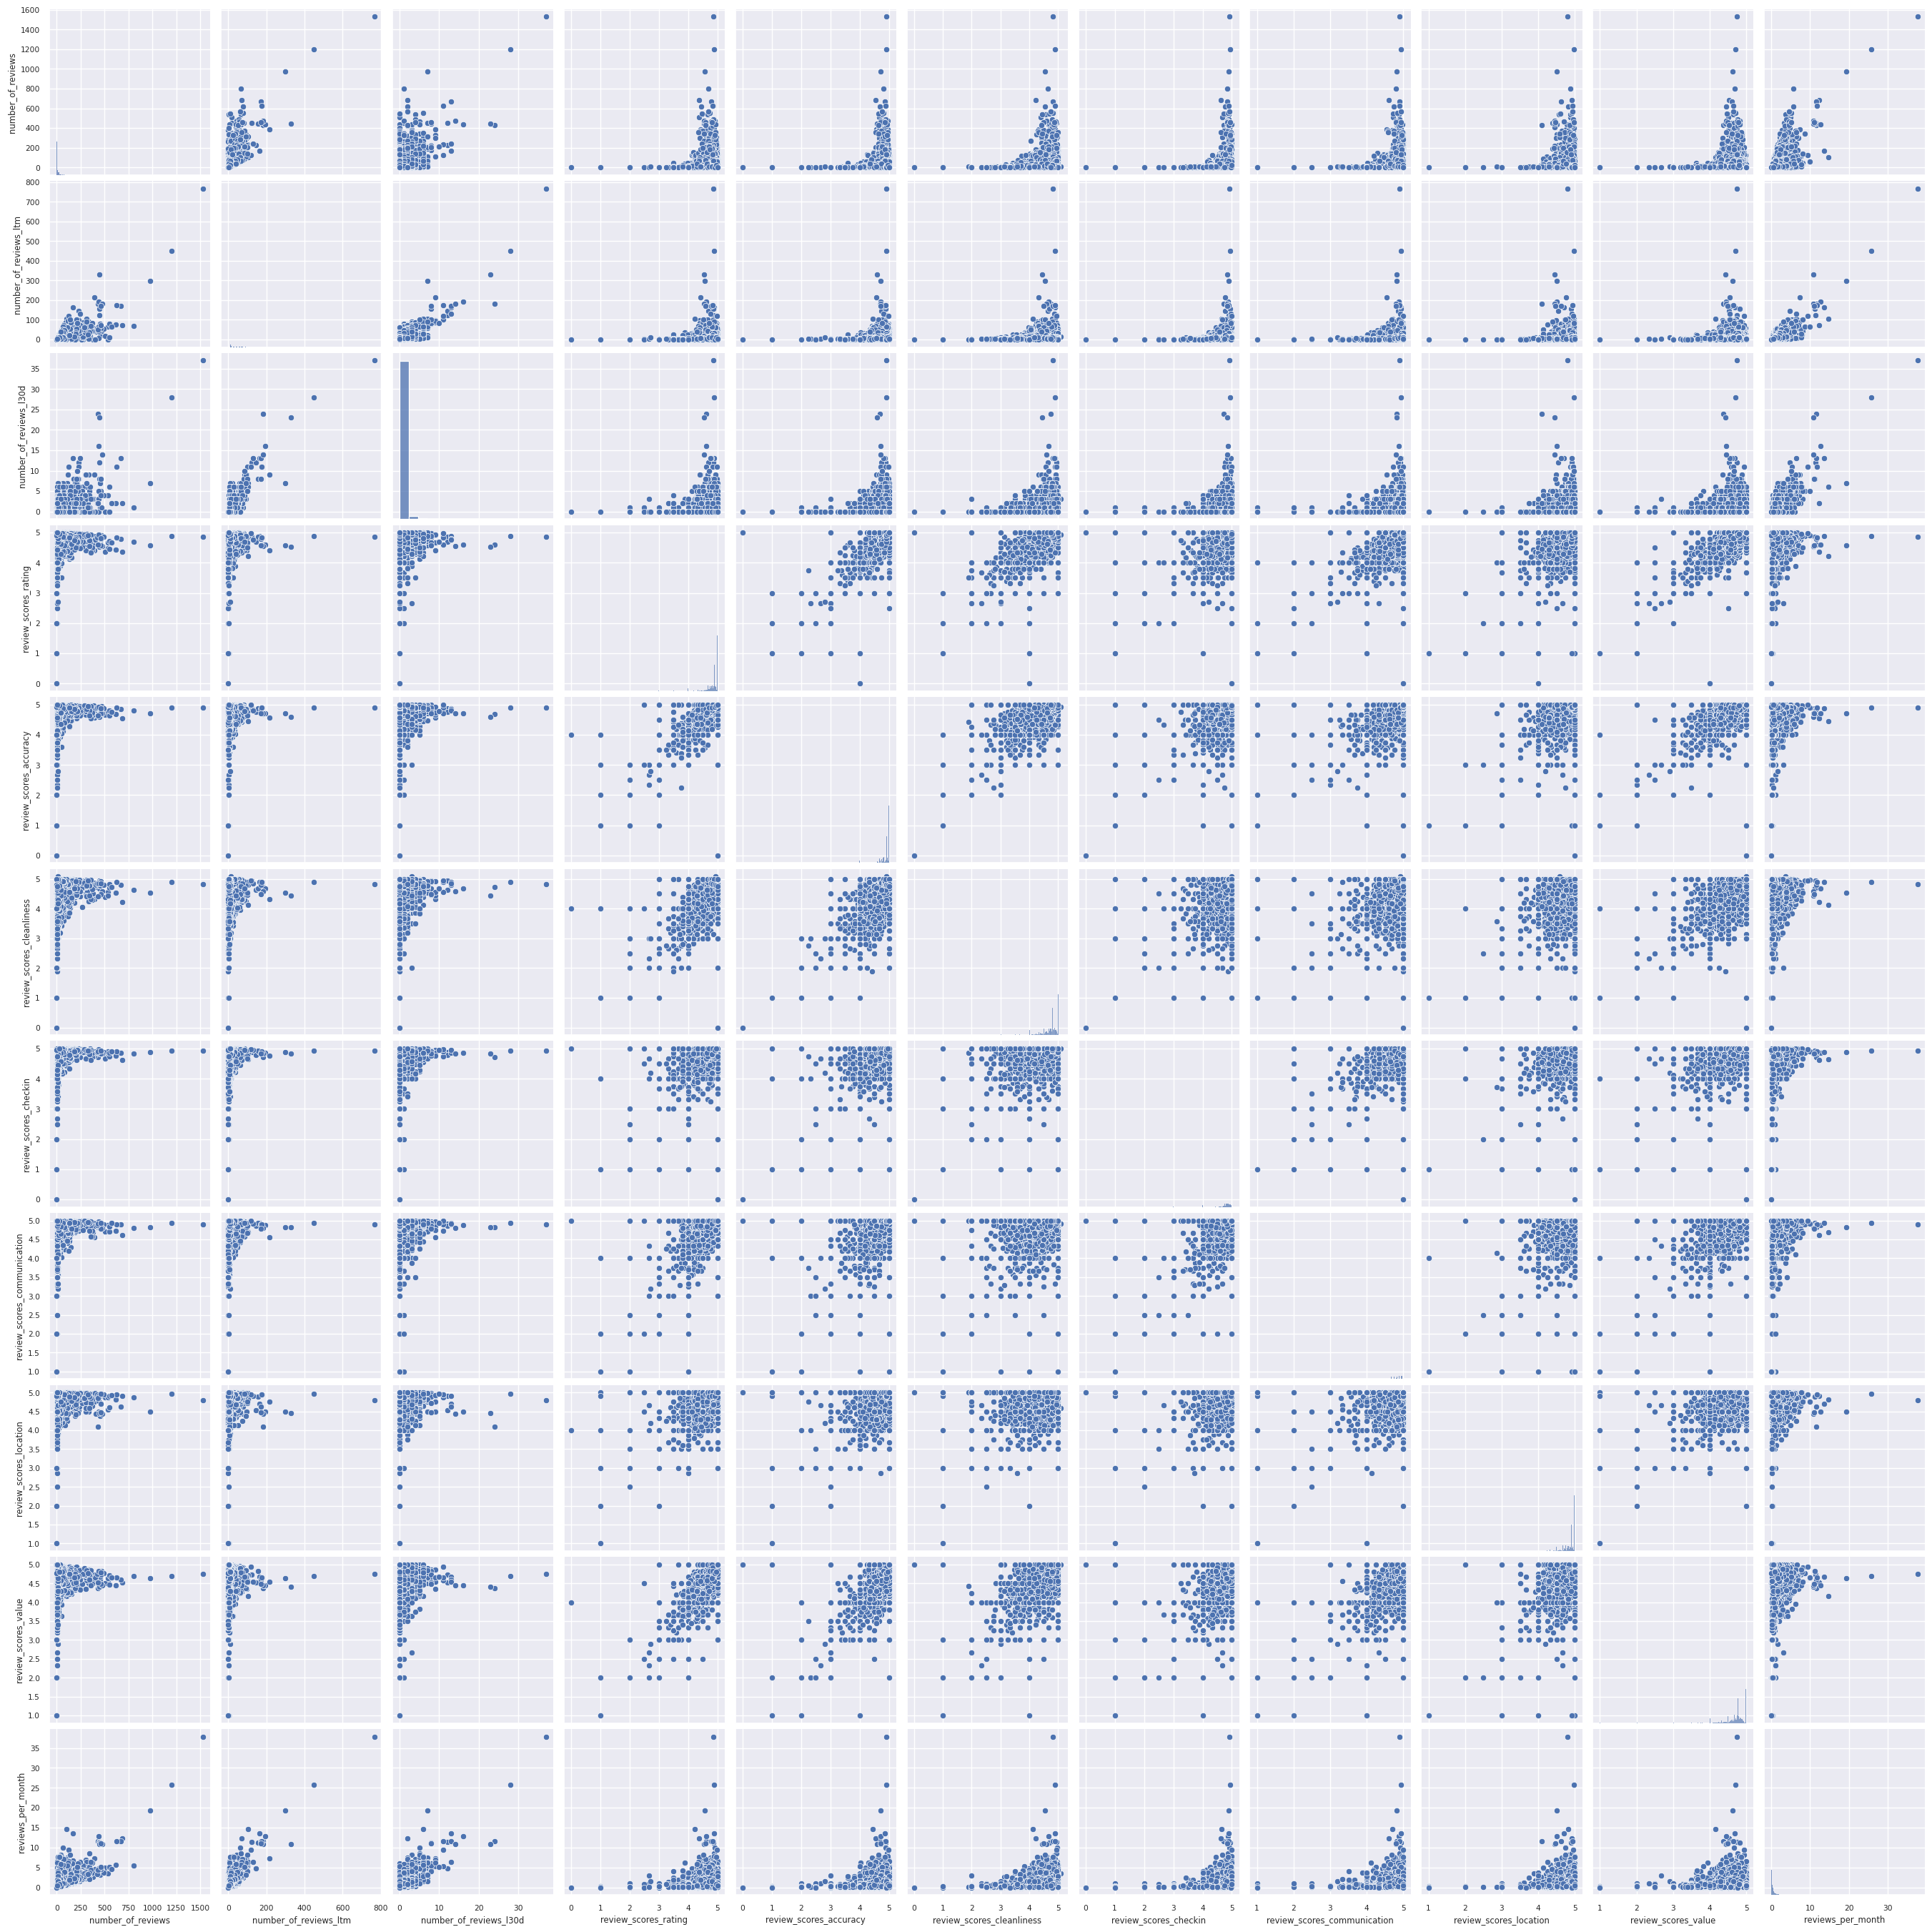

In [ ]:
sns.pairplot(data_review)

##Lokalizacja i dzielnice

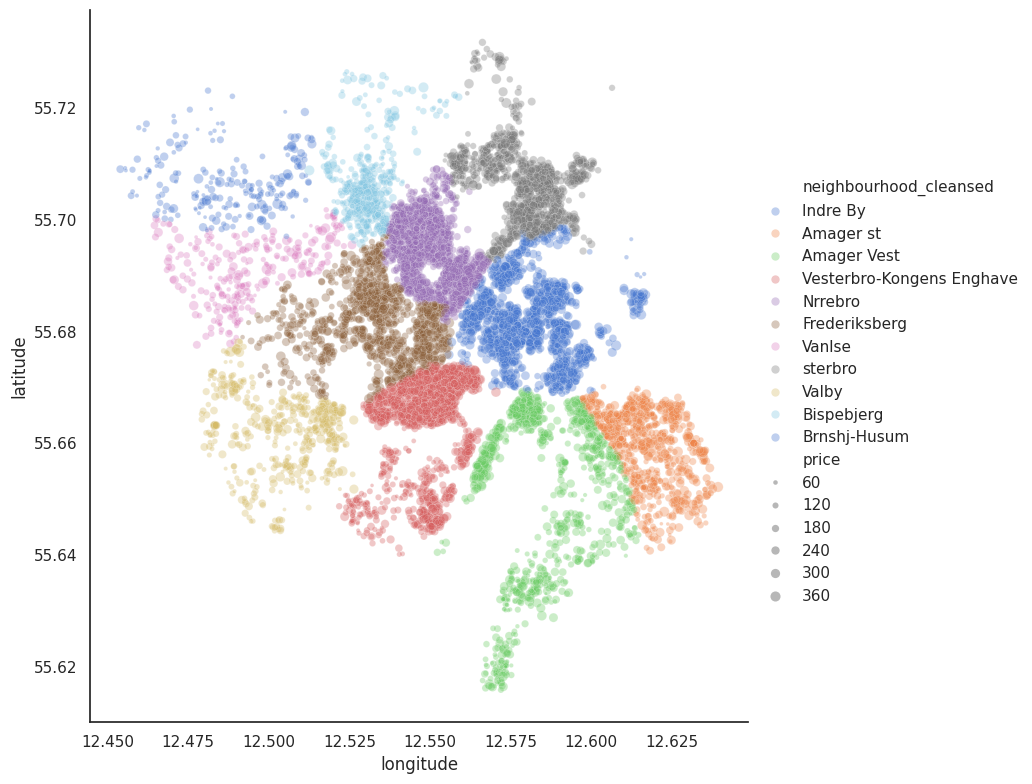

In [ ]:
#oferty danego hosta, z podziałem na dzielnice jak i na cenę (po usunięciu outlierów)

sns.set_theme(style="white")
sns.relplot(x="longitude", y="latitude", hue="neighbourhood_cleansed", size='price',
            alpha=0.35, palette="muted", sizes=(5,55),
            height=8, data=GetRidOfOutliers(data, 'price'))

#na wykresie widać ładnie zarysowane dzielnice
#można wykorzystać nakładając dane na prawdziwą mapę Kopenhagi

https://pl.copenhagenmap360.com/img/0/kopenhaga-dzielnice-mapa.jpg

# 5. Badanie zależności pomiędzy danymi kategorycznymi

##Funkcja do obliczania współczynnika Cramera

In [ ]:
#zdefiniowanie funkcji do obliczania współczynnika Cramera
def cramers_corrected_stat(x,y):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    result=-1
    if len(x.value_counts())==1 :
        print("First variable is constant")
    elif len(y.value_counts())==1:
        print("Second variable is constant")
    else:
        conf_matrix=pd.crosstab(x, y)

        if conf_matrix.shape[0]==2:
            correct=False
        else:
            correct=True

        chi2 = ss.chi2_contingency(conf_matrix, correction=correct)[0]

        n = sum(conf_matrix.sum())
        phi2 = chi2/n
        r,k = conf_matrix.shape
        phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
        rcorr = r - ((r-1)**2)/(n-1)
        kcorr = k - ((k-1)**2)/(n-1)
        result=np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))
    return round(result,6)

In [ ]:
#test funkcji
cramers_corrected_stat(data['neighbourhood_cleansed'], data['price'])

0.083662

##Odszukanie zmiennych kategorycznych

In [ ]:
#zmienne kategoryczne ->
'''
host_is_superhost
host_has_profile_pic
host_identity_verified
neighbourhood_cleansed
property_type
room_type
instant_bookable
'''

'\nhost_is_superhost\nhost_has_profile_pic\nhost_identity_verified\nneighbourhood_cleansed\nproperty_type\nroom_type\ninstant_bookable\n'

<Axes: xlabel='host_is_superhost', ylabel='price'>

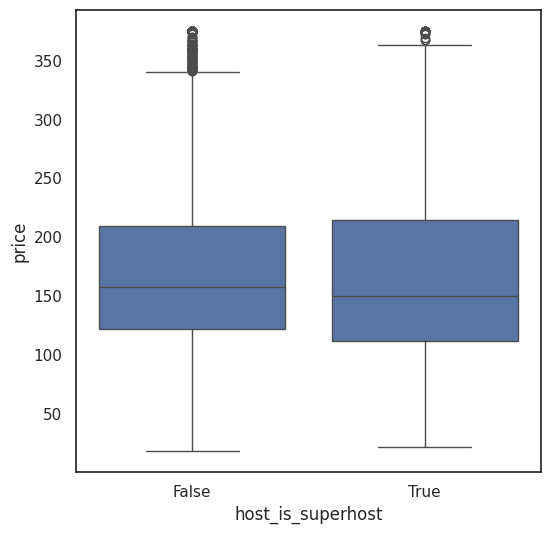

In [ ]:
plt.figure(figsize=(6, 6))
sns.boxplot(GetRidOfOutliers(data, 'price'), x='host_is_superhost', y='price')

##Obliczanie współczynnika Cramera

In [ ]:
categoricals = [
'host_is_superhost',
'host_has_profile_pic',
'host_identity_verified',
'neighbourhood_cleansed',
'property_type',
'room_type',
'instant_bookable'
]

#for cat1 in categoricals:
#  for cat2 in categoricals:
#    print(cat1, cat2, cramers_corrected_stat(data[cat1], data[cat2]))

for cat1 in categoricals:
  for cat2 in categoricals:
    if cramers_corrected_stat(data[cat1], data[cat2]) > 0.1 and cramers_corrected_stat(data[cat1], data[cat2]) != 1.0:
      print(cat1, cat2, cramers_corrected_stat(data[cat1], data[cat2]))

host_is_superhost property_type 0.179954
host_is_superhost room_type 0.108978
neighbourhood_cleansed property_type 0.153055
property_type host_is_superhost 0.179954
property_type neighbourhood_cleansed 0.153055
property_type room_type 0.99857
property_type instant_bookable 0.189963
room_type host_is_superhost 0.108978
room_type property_type 0.99857
instant_bookable property_type 0.189963


In [ ]:
'''
pary zmiennych kategorycznych o wysokim wspołczynniku Cramera V:
  host_is_superhost property_type 0.179954
  neighbourhood_cleansed property_type 0.153055
  property_type instant_bookable 0.189963

oraz, co oczywiste, zmienne praktycznie identyczne:
  property_type room_type 0.99857

'''

'\npary zmiennych kategorycznych o wysokim wspołczynniku Cramera V:\n  host_is_superhost property_type 0.179954\n  neighbourhood_cleansed property_type 0.153055\n  property_type instant_bookable 0.189963\n\noraz, co oczywiste, zmienne praktycznie identyczne:\n  property_type room_type 0.99857\n\n'

##Wizualizacja na wykresie mozaikowym na przykładzie jednej pary zmiennych kategorycznych

(<Figure size 640x480 with 3 Axes>,
 {('False', 'Private room'): (0.0,
   0.0,
   0.8702711635953109,
   0.08259473212874034),
  ('False', 'Entire home/apt'): (0.0,
   0.08589506216174364,
   0.8702711635953109,
   0.9056729089889074),
  ('False', 'Shared room'): (0.0,
   0.9948683011836542,
   0.8702711635953109,
   0.0014650950266739324),
  ('False', 'Hotel room'): (0.0,
   0.9996337262433316,
   0.8702711635953109,
   0.00036627375666842813),
  ('True', 'Private room'): (0.8752462879734203,
   0.0,
   0.12475371202657984,
   0.17885659533695303),
  ('True', 'Entire home/apt'): (0.8752462879734203,
   0.18215692536995634,
   0.12475371202657984,
   0.8095390184179708),
  ('True', 'Shared room'): (0.8752462879734203,
   0.9949962738209304,
   0.12475371202657984,
   0.0017033961460662093),
  ('True', 'Hotel room'): (0.8752462879734203, 1.0, 0.12475371202657984, 0.0)})

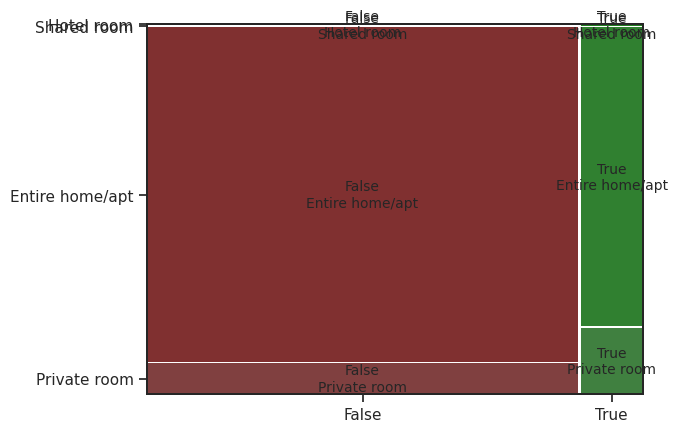

In [ ]:
mosaic(data, ['host_is_superhost', 'room_type'])

# 6. Badanie zależności pomiędzy zmienną kategoryczną a numeryczną

##Przygotowanie podzbioru danych

In [ ]:
### regresja liniowa - zbadanie zaleśności ceny od dzielnicy oraz typu pokoju

data_short = data[['room_type', 'neighbourhood_cleansed', 'price']]
data_short.head()

room_type     neighbourhood_cleansed  price
id                                                                   
772195193586734462     Private room                   Indre By    NaN
993508926988263521  Entire home/apt                  Amager st  129.0
973046361084511805  Entire home/apt                Amager Vest  150.0
52551491            Entire home/apt  Vesterbro-Kongens Enghave  180.0
723099448414722172  Entire home/apt  Vesterbro-Kongens Enghave  210.0

In [ ]:
# zmiana wartości dzielnicy jako dane kategoryczne na oddzielne kolumny 1/0

columns_encode = ['room_type', 'neighbourhood_cleansed']
data_short = pd.get_dummies(data_short, columns=columns_encode, prefix=columns_encode)

In [ ]:
data_short = data_short.dropna()

In [ ]:
data_short = GetRidOfOutliers(data_short, 'price')

<Axes: ylabel='Frequency'>

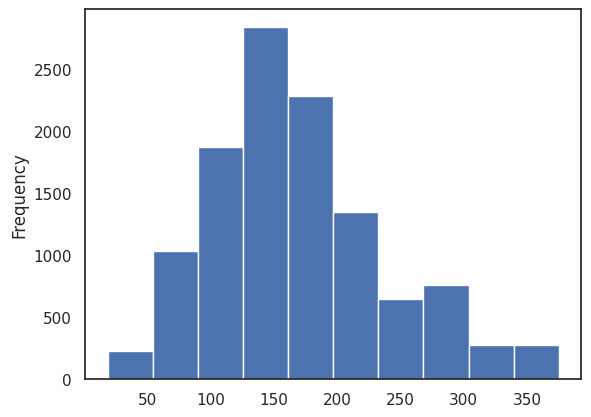

In [ ]:
data_short['price'].plot.hist()

In [ ]:
data_short.rename(columns=
{
       'room_type_Entire home/apt' : 'room_type_entire_home_apt',
       'room_type_Hotel room' : 'room_type_hotel_room',
       'room_type_Private room' : 'room_type_private_room',
       'room_type_Shared room' : 'room_type_shared_room',
       'neighbourhood_cleansed_Amager Vest' : 'n_Amager_Vest',
       'neighbourhood_cleansed_Amager st' : 'n_Amager_st',
       'neighbourhood_cleansed_Bispebjerg' : 'n_Bispebjerg',
       'neighbourhood_cleansed_Brnshj-Husum' : 'n_Brnshj_Husum',
       'neighbourhood_cleansed_Frederiksberg' : 'n_Frederiksberg',
       'neighbourhood_cleansed_Indre By' : 'n_Indre_By',
       'neighbourhood_cleansed_Nrrebro' : 'n_Nrrebro',
       'neighbourhood_cleansed_Valby' : 'n_Valby',
       'neighbourhood_cleansed_Vanlse' : 'n_Vanlse',
       'neighbourhood_cleansed_Vesterbro-Kongens Enghave' : 'n_Vesterbro_Kongens_Enghave',
       'neighbourhood_cleansed_sterbro' : 'n_sterbro'
}, inplace=True)

In [ ]:
data_short.head()

price  room_type_entire_home_apt  room_type_hotel_room  \
id                                                                           
993508926988263521  129.0                          1                     0   
973046361084511805  150.0                          1                     0   
52551491            180.0                          1                     0   
723099448414722172  210.0                          1                     0   
875277330195342299  165.0                          1                     0   

                    room_type_private_room  room_type_shared_room  \
id                                                                  
993508926988263521                       0                      0   
973046361084511805                       0                      0   
52551491                                 0                      0   
723099448414722172                       0                      0   
875277330195342299                       0                      0   

                    n_Amager_Vest  n_Amager_st  n_Bispebjerg  n_Brnshj_Husum  \
id                                                                             
993508926988263521              0            1             0               0   
973046361084511805              1            0             0               0   
52551491                        0            0             0               0   
723099448414722172              0            0             0               0   
875277330195342299              0            0             0               0   

                    n_Frederiksberg  n_Indre_By  n_Nrrebro  n_Valby  n_Vanlse  \
id                                                                              
993508926988263521                0           0          0        0         0   
973046361084511805                0           0          0        0         0   
52551491                          0           0          0        0         0   
723099448414722172                0           0          0        0         0   
875277330195342299                0           1          0        0         0   

                    n_Vesterbro_Kongens_Enghave  n_sterbro  
id                                                          
993508926988263521                            0          0  
973046361084511805                            0          0  
52551491                                      1          0  
723099448414722172                            1          0  
875277330195342299                            0          0

##Zbadanie zależności ceny od dzielnicy

In [ ]:
model = smf.ols(
    '''price ~
n_Amager_Vest +
n_Amager_st +
n_Bispebjerg +
n_Brnshj_Husum +
n_Frederiksberg +
n_Indre_By +
n_Nrrebro +
n_Valby +
n_Vanlse +
n_Vesterbro_Kongens_Enghave +
n_sterbro''',
data=data_short).fit()


'''
price ~
room_type_entire_home_apt +
room_type_hotel_room +
room_type_shared_room +
room_type_private_room +
n_Amager_Vest +
n_Amager_st +
n_Bispebjerg +
n_Brnshj_Husum +
n_Frederiksberg +
n_Indre_By +
n_Nrrebro +
n_Valby +
n_Vanlse +
n_Vesterbro_Kongens_Enghave +
n_sterbro'''


'\nprice ~\nroom_type_entire_home_apt +\nroom_type_hotel_room +\nroom_type_shared_room +\nroom_type_private_room +\nn_Amager_Vest +\nn_Amager_st +\nn_Bispebjerg +\nn_Brnshj_Husum +\nn_Frederiksberg +\nn_Indre_By +\nn_Nrrebro +\nn_Valby +\nn_Vanlse +\nn_Vesterbro_Kongens_Enghave +\nn_sterbro'

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     100.1
Date:                Thu, 08 Feb 2024   Prob (F-statistic):          6.68e-200
Time:                        08:29:23   Log-Likelihood:                -64948.
No. Observations:               11547   AIC:                         1.299e+05
Df Residuals:                   11536   BIC:                         1.300e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [ ]:
model.predict(model.model.data.frame)
data_model_preds = pd.concat([data_short, model.predict(data_short).rename('predict')], axis =1)
data_model_preds
print(np.sqrt(model.mse_resid))

67.09991662192411


##Zbadanie zależności ceny od typu lokalu

In [ ]:
model = smf.ols(
'''
price ~
room_type_entire_home_apt +
room_type_hotel_room +
room_type_shared_room +
room_type_private_room
''',
data=data_short).fit()

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     703.1
Date:                Thu, 08 Feb 2024   Prob (F-statistic):               0.00
Time:                        08:29:23   Log-Likelihood:                -64459.
No. Observations:               11547   AIC:                         1.289e+05
Df Residuals:                   11543   BIC:                         1.290e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [ ]:
model.predict(model.model.data.frame)
data_model_preds = pd.concat([data_short, model.predict(data_short).rename('predict')], axis =1)
data_model_preds
print(np.sqrt(model.mse_resid))

64.30103647135637


##Stworzenie modelu regresji liniowej badającej zależność ceny od obu danych kategorycznych

In [ ]:
model = smf.ols(
'''
price ~
room_type_entire_home_apt +
room_type_hotel_room +
room_type_private_room +
room_type_shared_room +
n_Amager_Vest +
n_Amager_st +
n_Bispebjerg +
n_Brnshj_Husum +
n_Frederiksberg +
n_Indre_By +
n_Nrrebro +
n_Valby +
n_Vanlse +
n_Vesterbro_Kongens_Enghave +
n_sterbro''',
data=data_short).fit()

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     257.8
Date:                Thu, 08 Feb 2024   Prob (F-statistic):               0.00
Time:                        08:29:23   Log-Likelihood:                -63956.
No. Observations:               11547   AIC:                         1.279e+05
Df Residuals:                   11533   BIC:                         1.280e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [ ]:
model.predict(model.model.data.frame)
data_model_preds = pd.concat([data_short, model.predict(data_short).rename('predict')], axis =1)
data_model_preds
print(np.sqrt(model.mse_resid))

61.5832651921314


##Ocena modelu

In [ ]:
#Błąd w każdym przypadku regresji liniowej jest duży, model nie posiada wystarczająco dużo danych potrzebnych do lepszej predykcji ceny
#Lokalizacja (dzielnica), podobnie jak typ lokalu ma wpływ na cenę, jest ona jednak uzależniona od wielu innych aspektów, prawdopodobnie od cech stricte lokalu (miejsc zakwaterowania etc)
#Do modelu trzeba byłoby metodą prób i błędów pobierać kolejne zmienne w celu zminimalizowania błędu
#Dobrym pomysłem byłoby również stworzenie kilku modeli, podzielonych na bazie zmiennych kategorycznych np. oddzielnie dla prywatnych pokoi i oddzielnie dla aprartamentów
#Dane dotyczące podziału na rodzaj lokalu charakteryzują się wysokim współczynnikiem P, który jest powyżej założonego progu istotności p=0,05

#Analizując model złożony z dnaych o dzielnicy i typu lokalu:
#Drogo wypada cena za apartament w Indre By - 77.57 (intercept) + 87.37 (apartament) + 52.41 (Indre By) = 217,35$
#Natomast tanio wypada pokój współdzielony w dzielnicy Bispebjerg - 36,45$ - lecz jak wspomniano wyżej, pokój współdzielony charakteruzuje się wysiokim P, więc nie jest to wniosek podparty mocnym argumentem (nie można odrzucić hipotezy zerowej)

<Axes: xlabel='price', ylabel='neighbourhood_cleansed'>

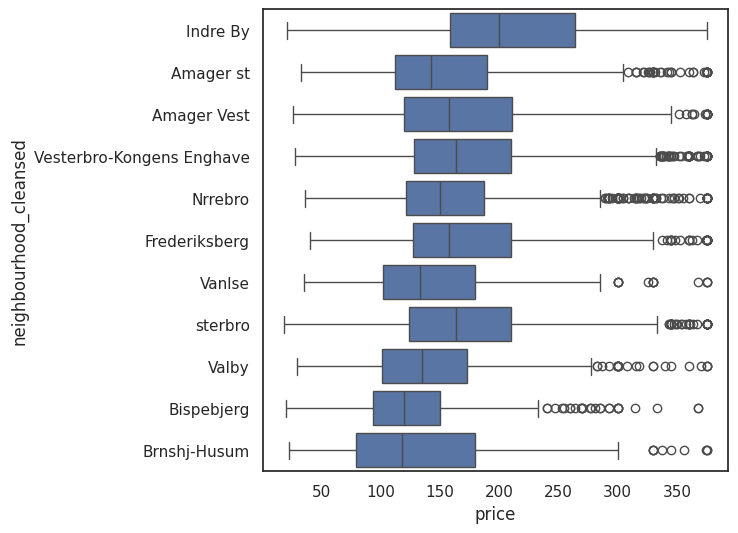

In [ ]:
plt.figure(figsize=(6, 6))
sns.boxplot(GetRidOfOutliers(data, 'price'), x='price', y='neighbourhood_cleansed')

<Axes: xlabel='price', ylabel='room_type'>

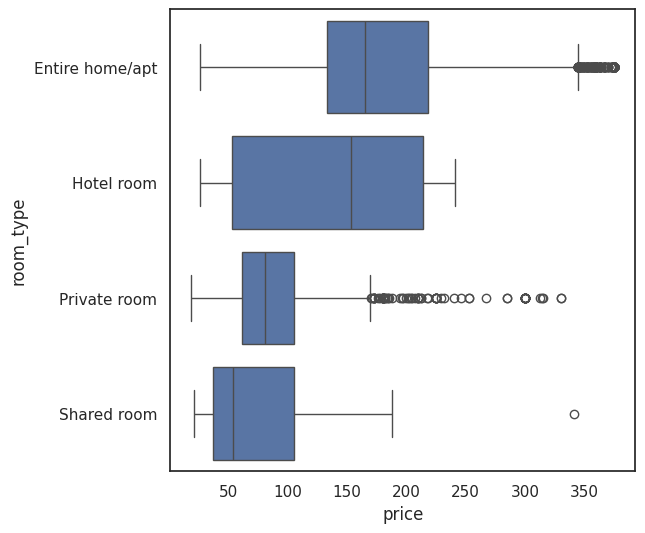

In [ ]:
plt.figure(figsize=(6, 6))
sns.boxplot(GetRidOfOutliers(data, 'price'), x='price', y='room_type')

# 7. Podpis

In [ ]:
#Wykonał:
#Wojciech Cendrowski pd4255
#22.01.2024